In [1]:
# Imports - run first
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from geoscripts.dz import dz

samples_published = dz.load_all()

samples_new = dz.load_all('UCD22/')


samples = samples_published + samples_new

def plot_fault_block(names,save=False,filename=None):
    smps = [smp for smp in samples if smp.name in names]
    
    nplots = len(names)
    height = nplots*1.5
    
    fig,axs = plt.subplots(nplots,dpi=300,figsize=(7.5,height))
    
    if len(names)==1:
        smp = smps[0]
        smp.kde(ax=axs)
        axs.set_title(smp.name)
        axs.set_xlim(100,4000)
    
    else:
        for k,smp in enumerate(smps):
            smp.kde(ax=axs[k])
            axs[k].set_title(smp.name)
            axs[k].set_xlim(100,4000)

    plt.tight_layout()
    
    if save == True:
        fig.savefig(filename)
    
    return(smps)

all_called = []

['N3', 'N2', 'N1', 'CT130918-2A']


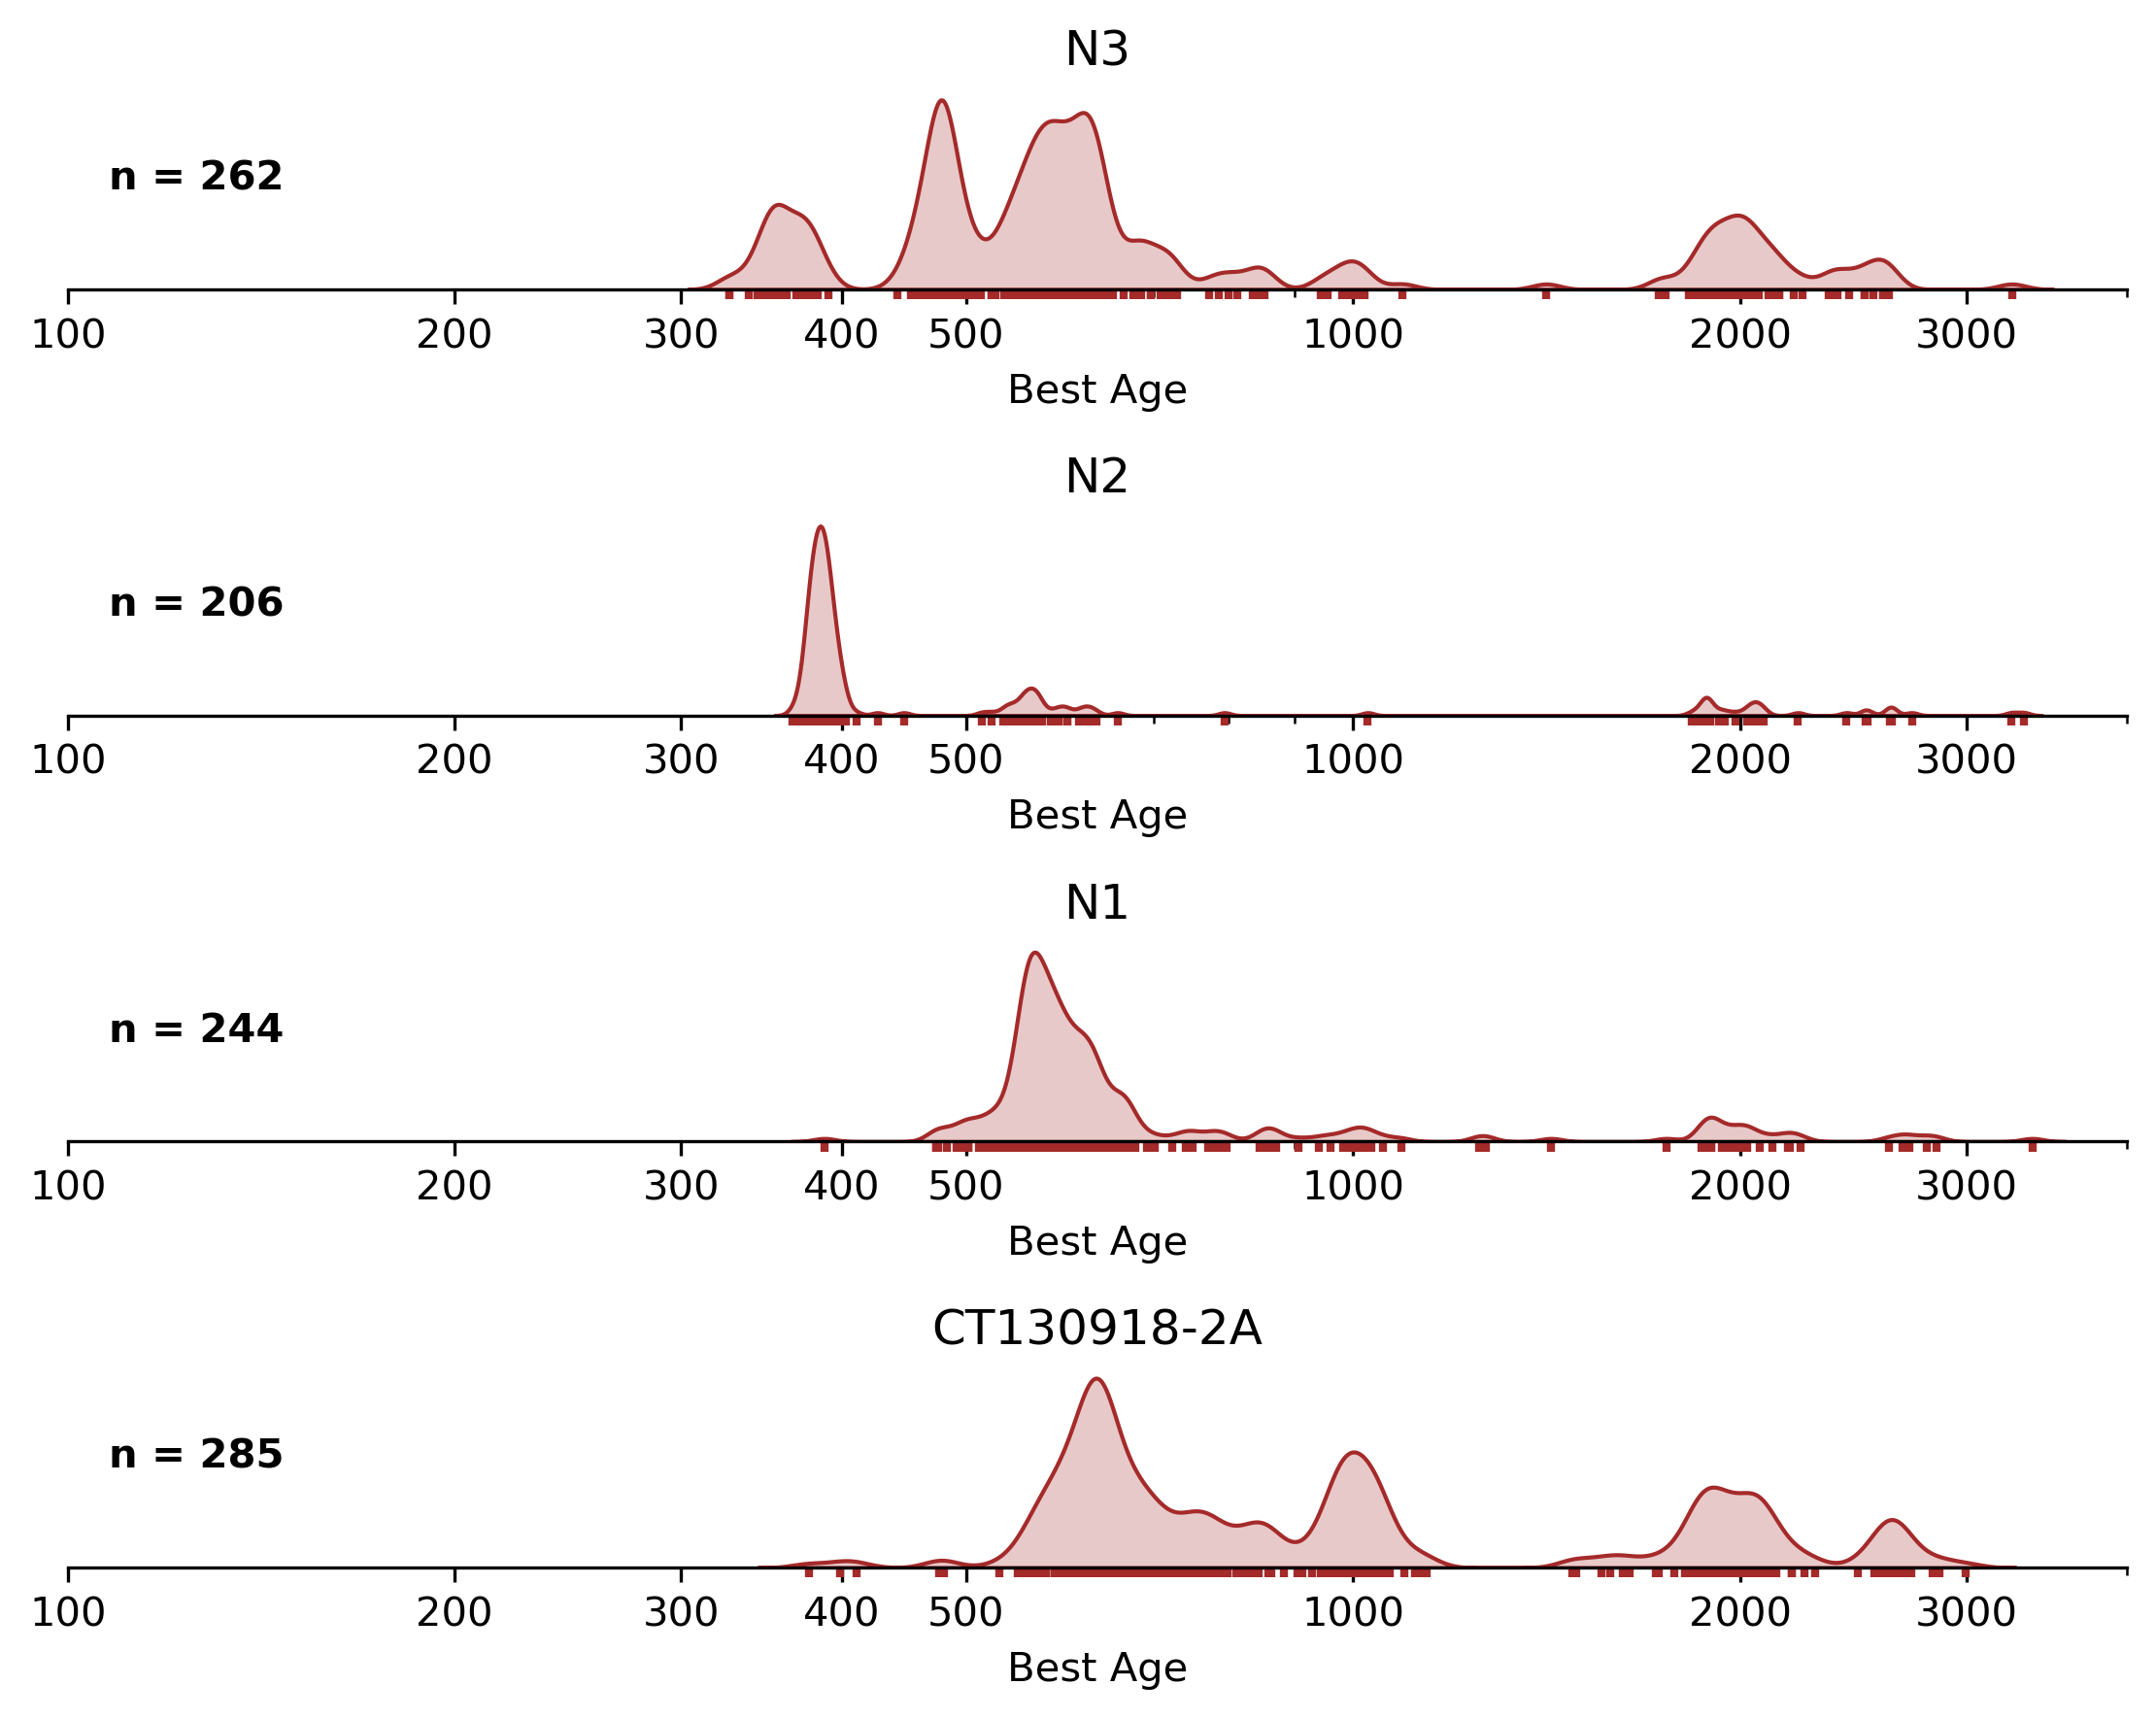

In [2]:
smps = []

for sample in samples:
    ysg = np.min(sample.bestage)
    n = len(sample.bestage)
    modern = sample.color == 'red'

    if (ysg > 320) & (n > 15) & ~modern:
        sample.color = 'brown'
        smps.append(sample.name)

print(smps)

plot_fault_block(smps,save=True,filename='Pz.jpg')

all_called = all_called + smps

['NW-GC', 'N5', '100211-9A', 'CT130918-9A']


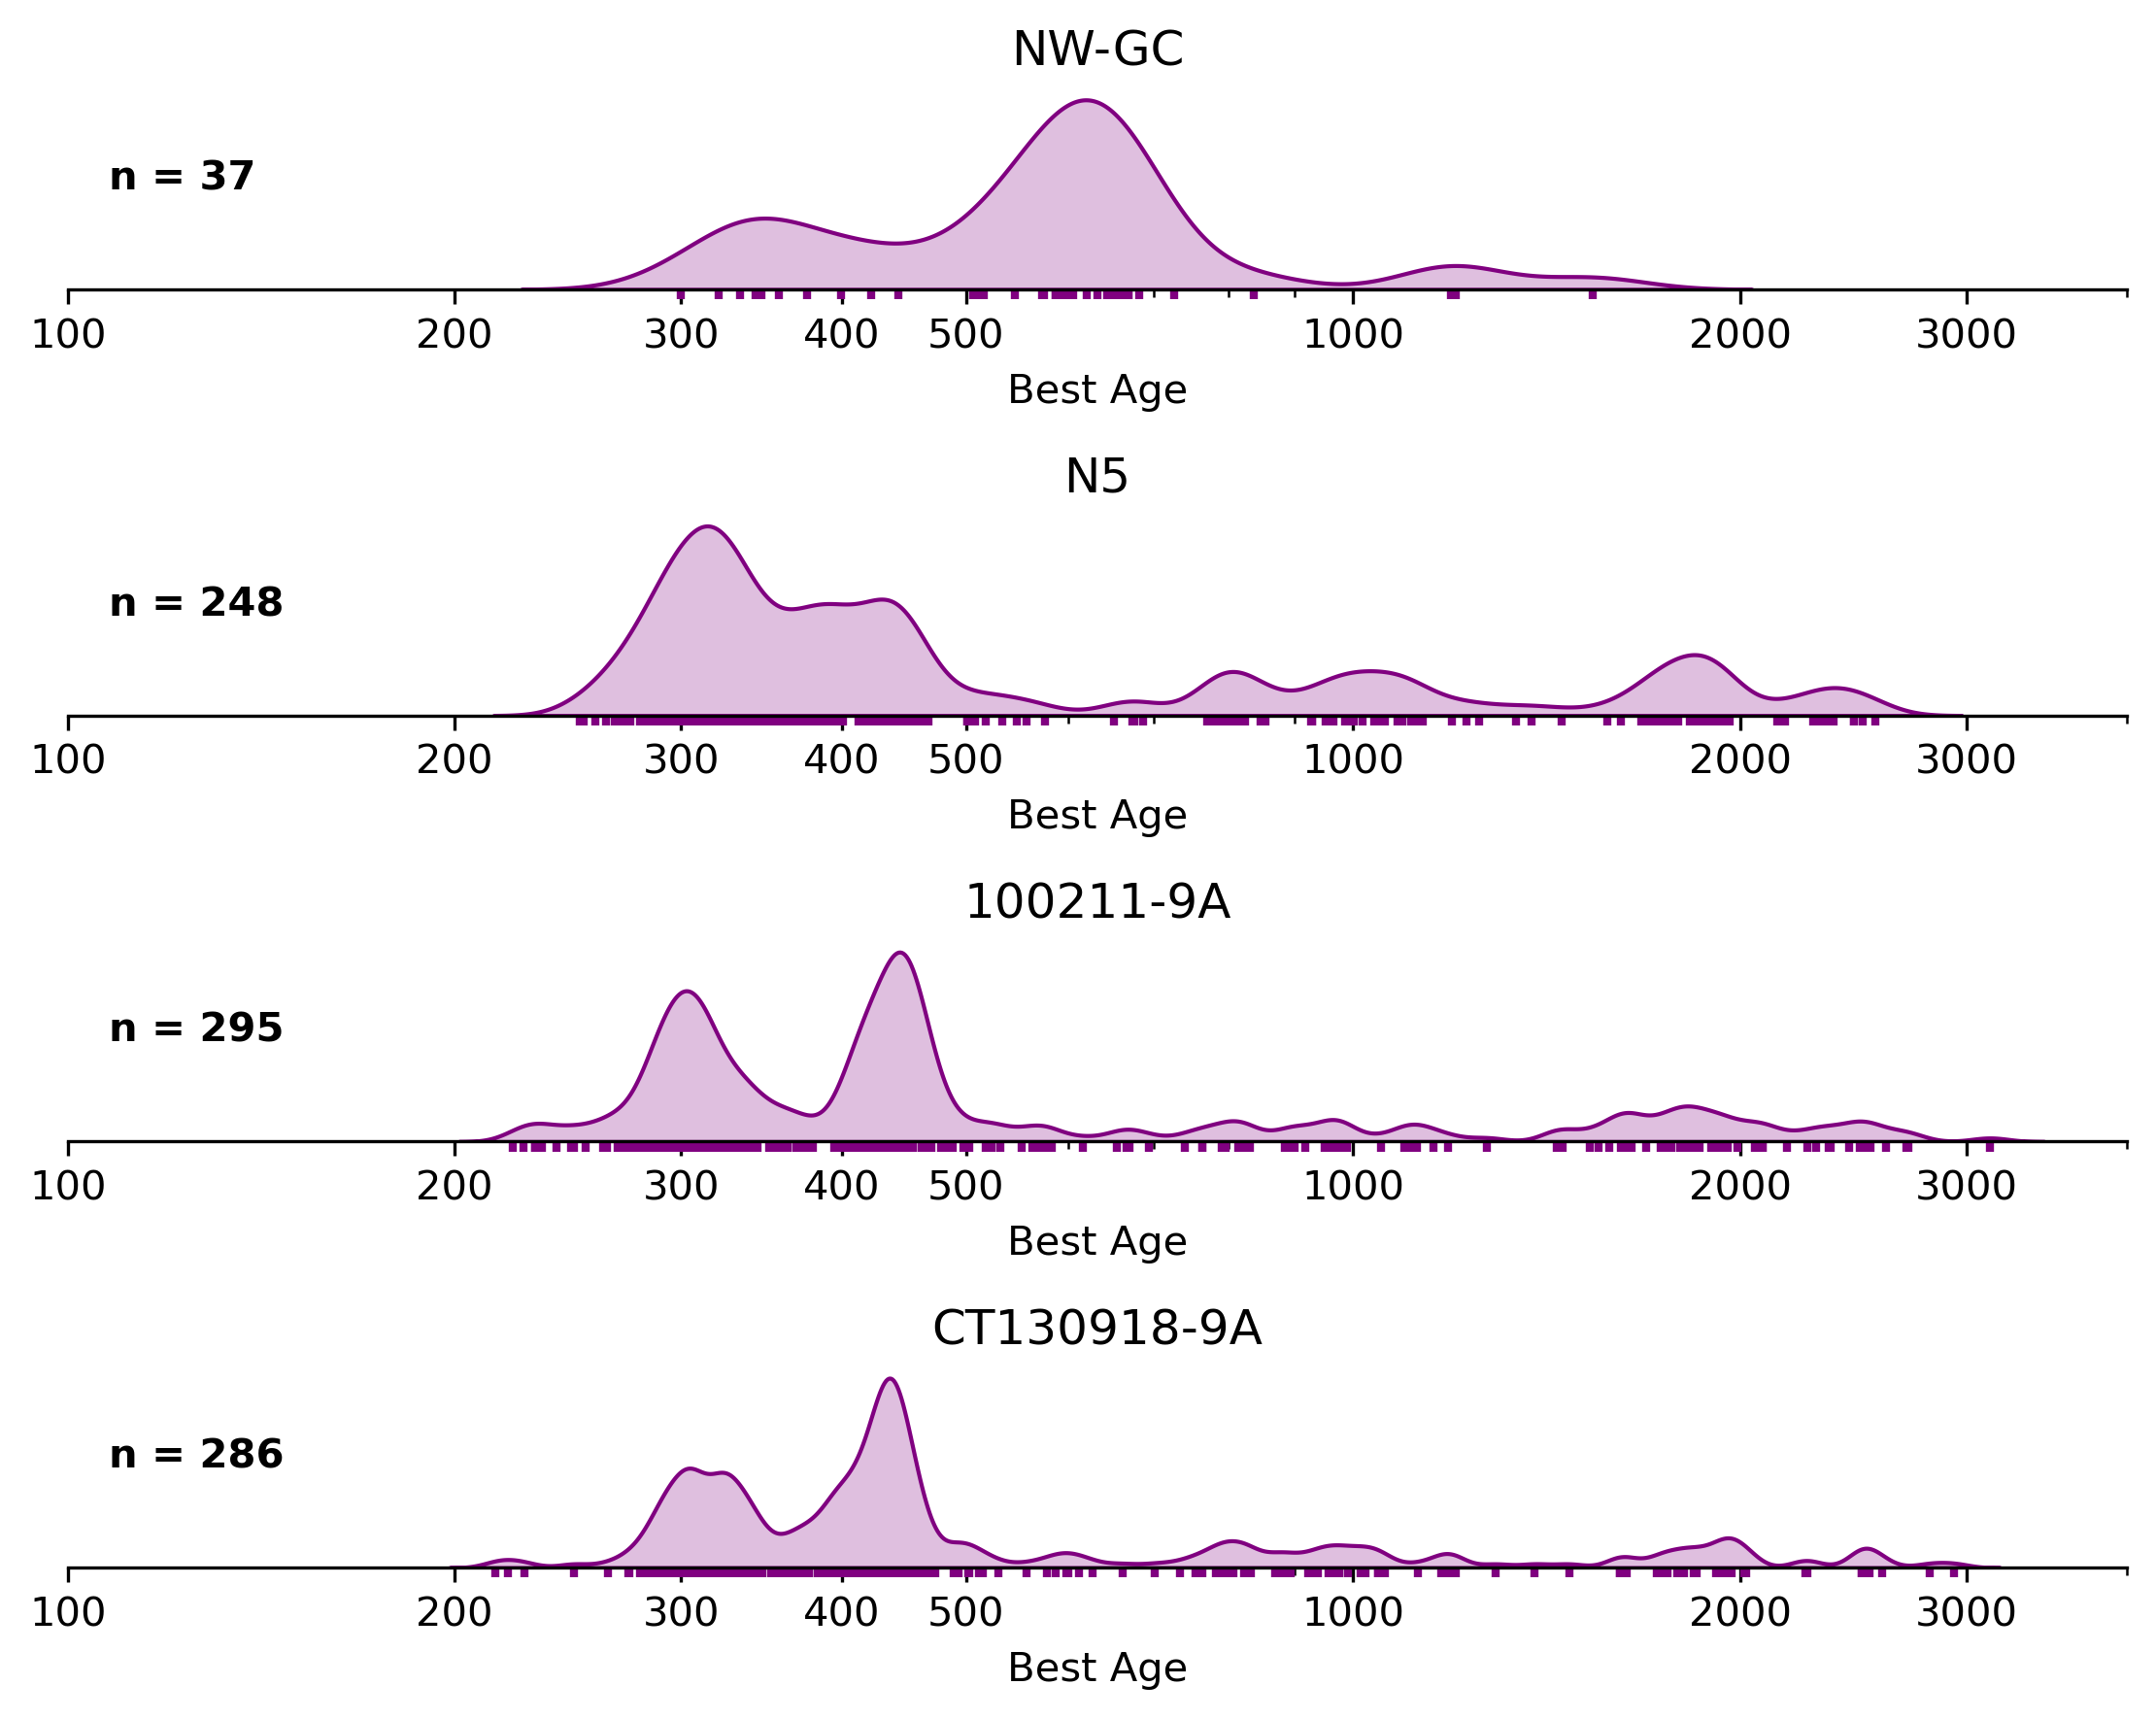

In [3]:
smps = []

for sample in samples:
    ysg = np.min(sample.bestage)
    n = len(sample.bestage)
    modern = sample.color == 'red'

    if (ysg < 320) & (ysg > 200) & (n > 15) & ~modern & ~('K' in sample.name) & ~('N4' in sample.name):
        sample.color = 'purple'
        smps.append(sample.name)

print(smps)

plot_fault_block(smps,save=True,filename='PTr.jpg')

all_called = all_called + smps

196.6 (Jurassic)
Tithonian
Bajocian
J2
J2
J1
J1
['K3', 'NE-GC', 'GC41', 'CT15076', '100411-5', 'CT130919-5A', 'AB0913']


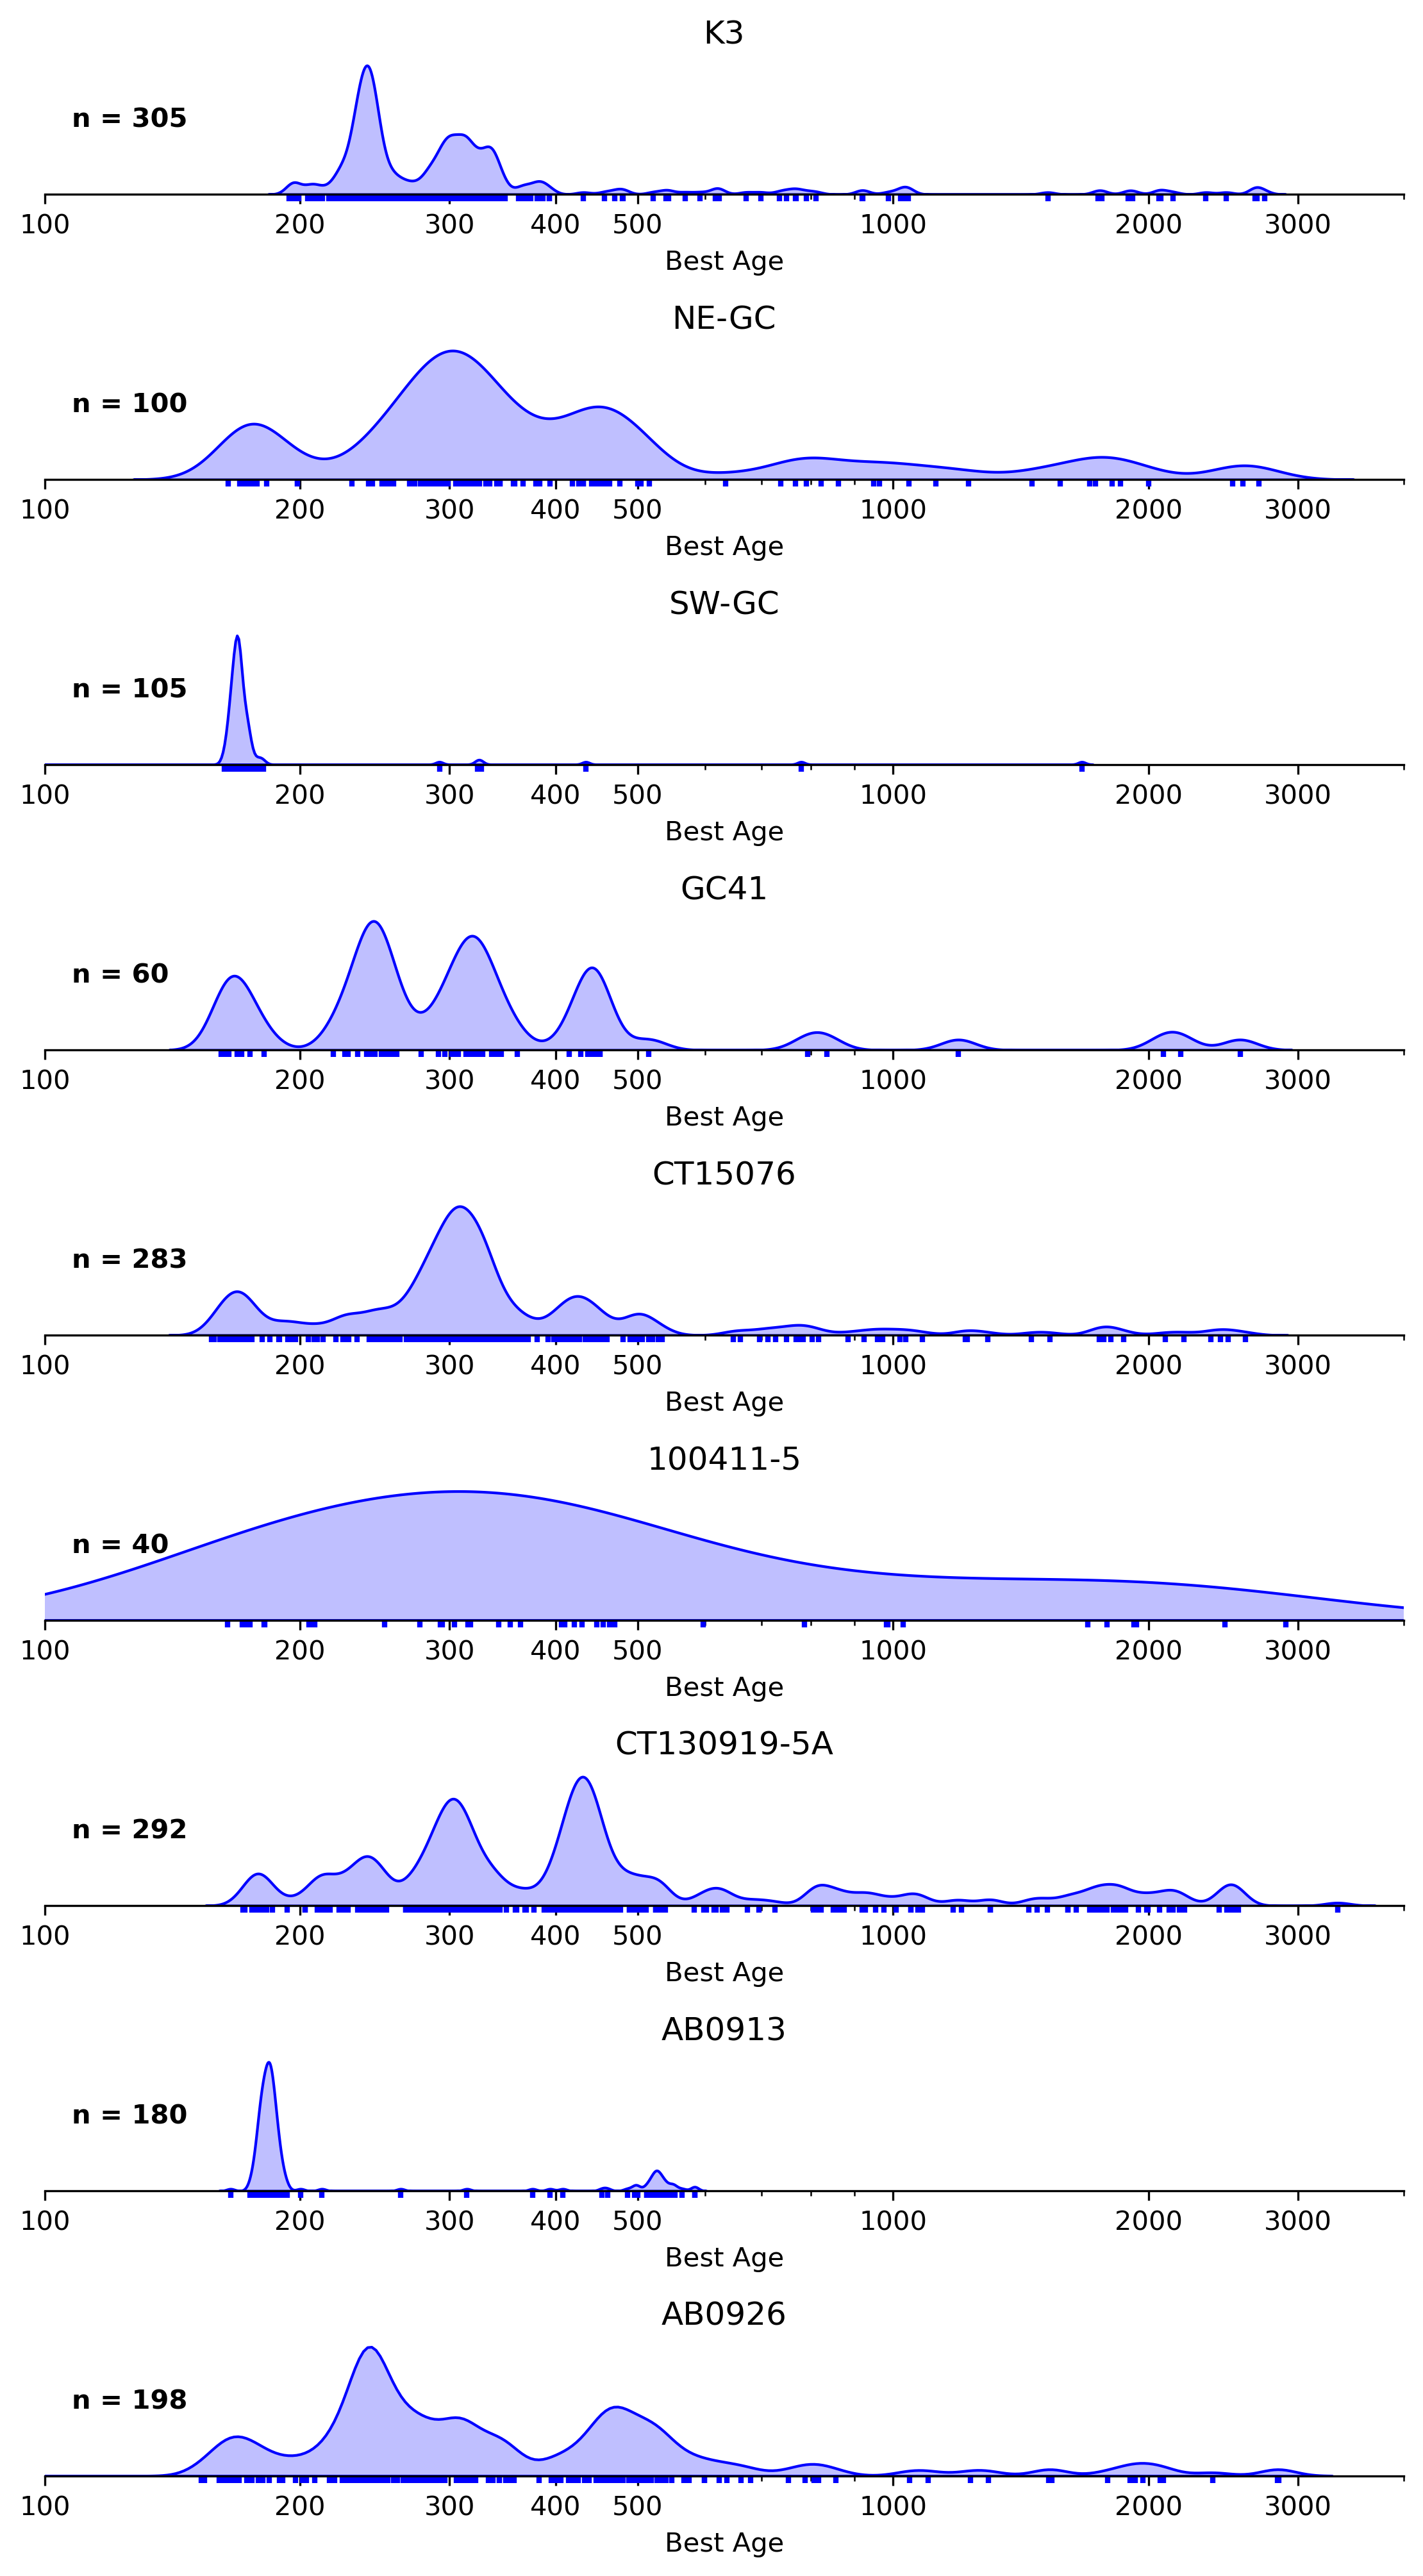

In [4]:
smps = []

for sample in samples:
    ysg = np.min(sample.bestage)
    n = len(sample.bestage)
    modern = sample.color == 'red'

    if ((ysg < 200) & (ysg > 140) & (n > 15) & ~modern & ~('W' in sample.name)):
        sample.color = 'blue'
        smps.append(sample.name)
        print(sample.reported_age)

print(smps)

plot_fault_block(smps + ['AB0926','SW-GC'], save=True,filename='J.jpg')

all_called = all_called + smps + ['AB0926','SW-GC']

Cenomanian
K1
K1
K2
['SE-GC', '100211-1A', 'CT15092', 'CT15113']


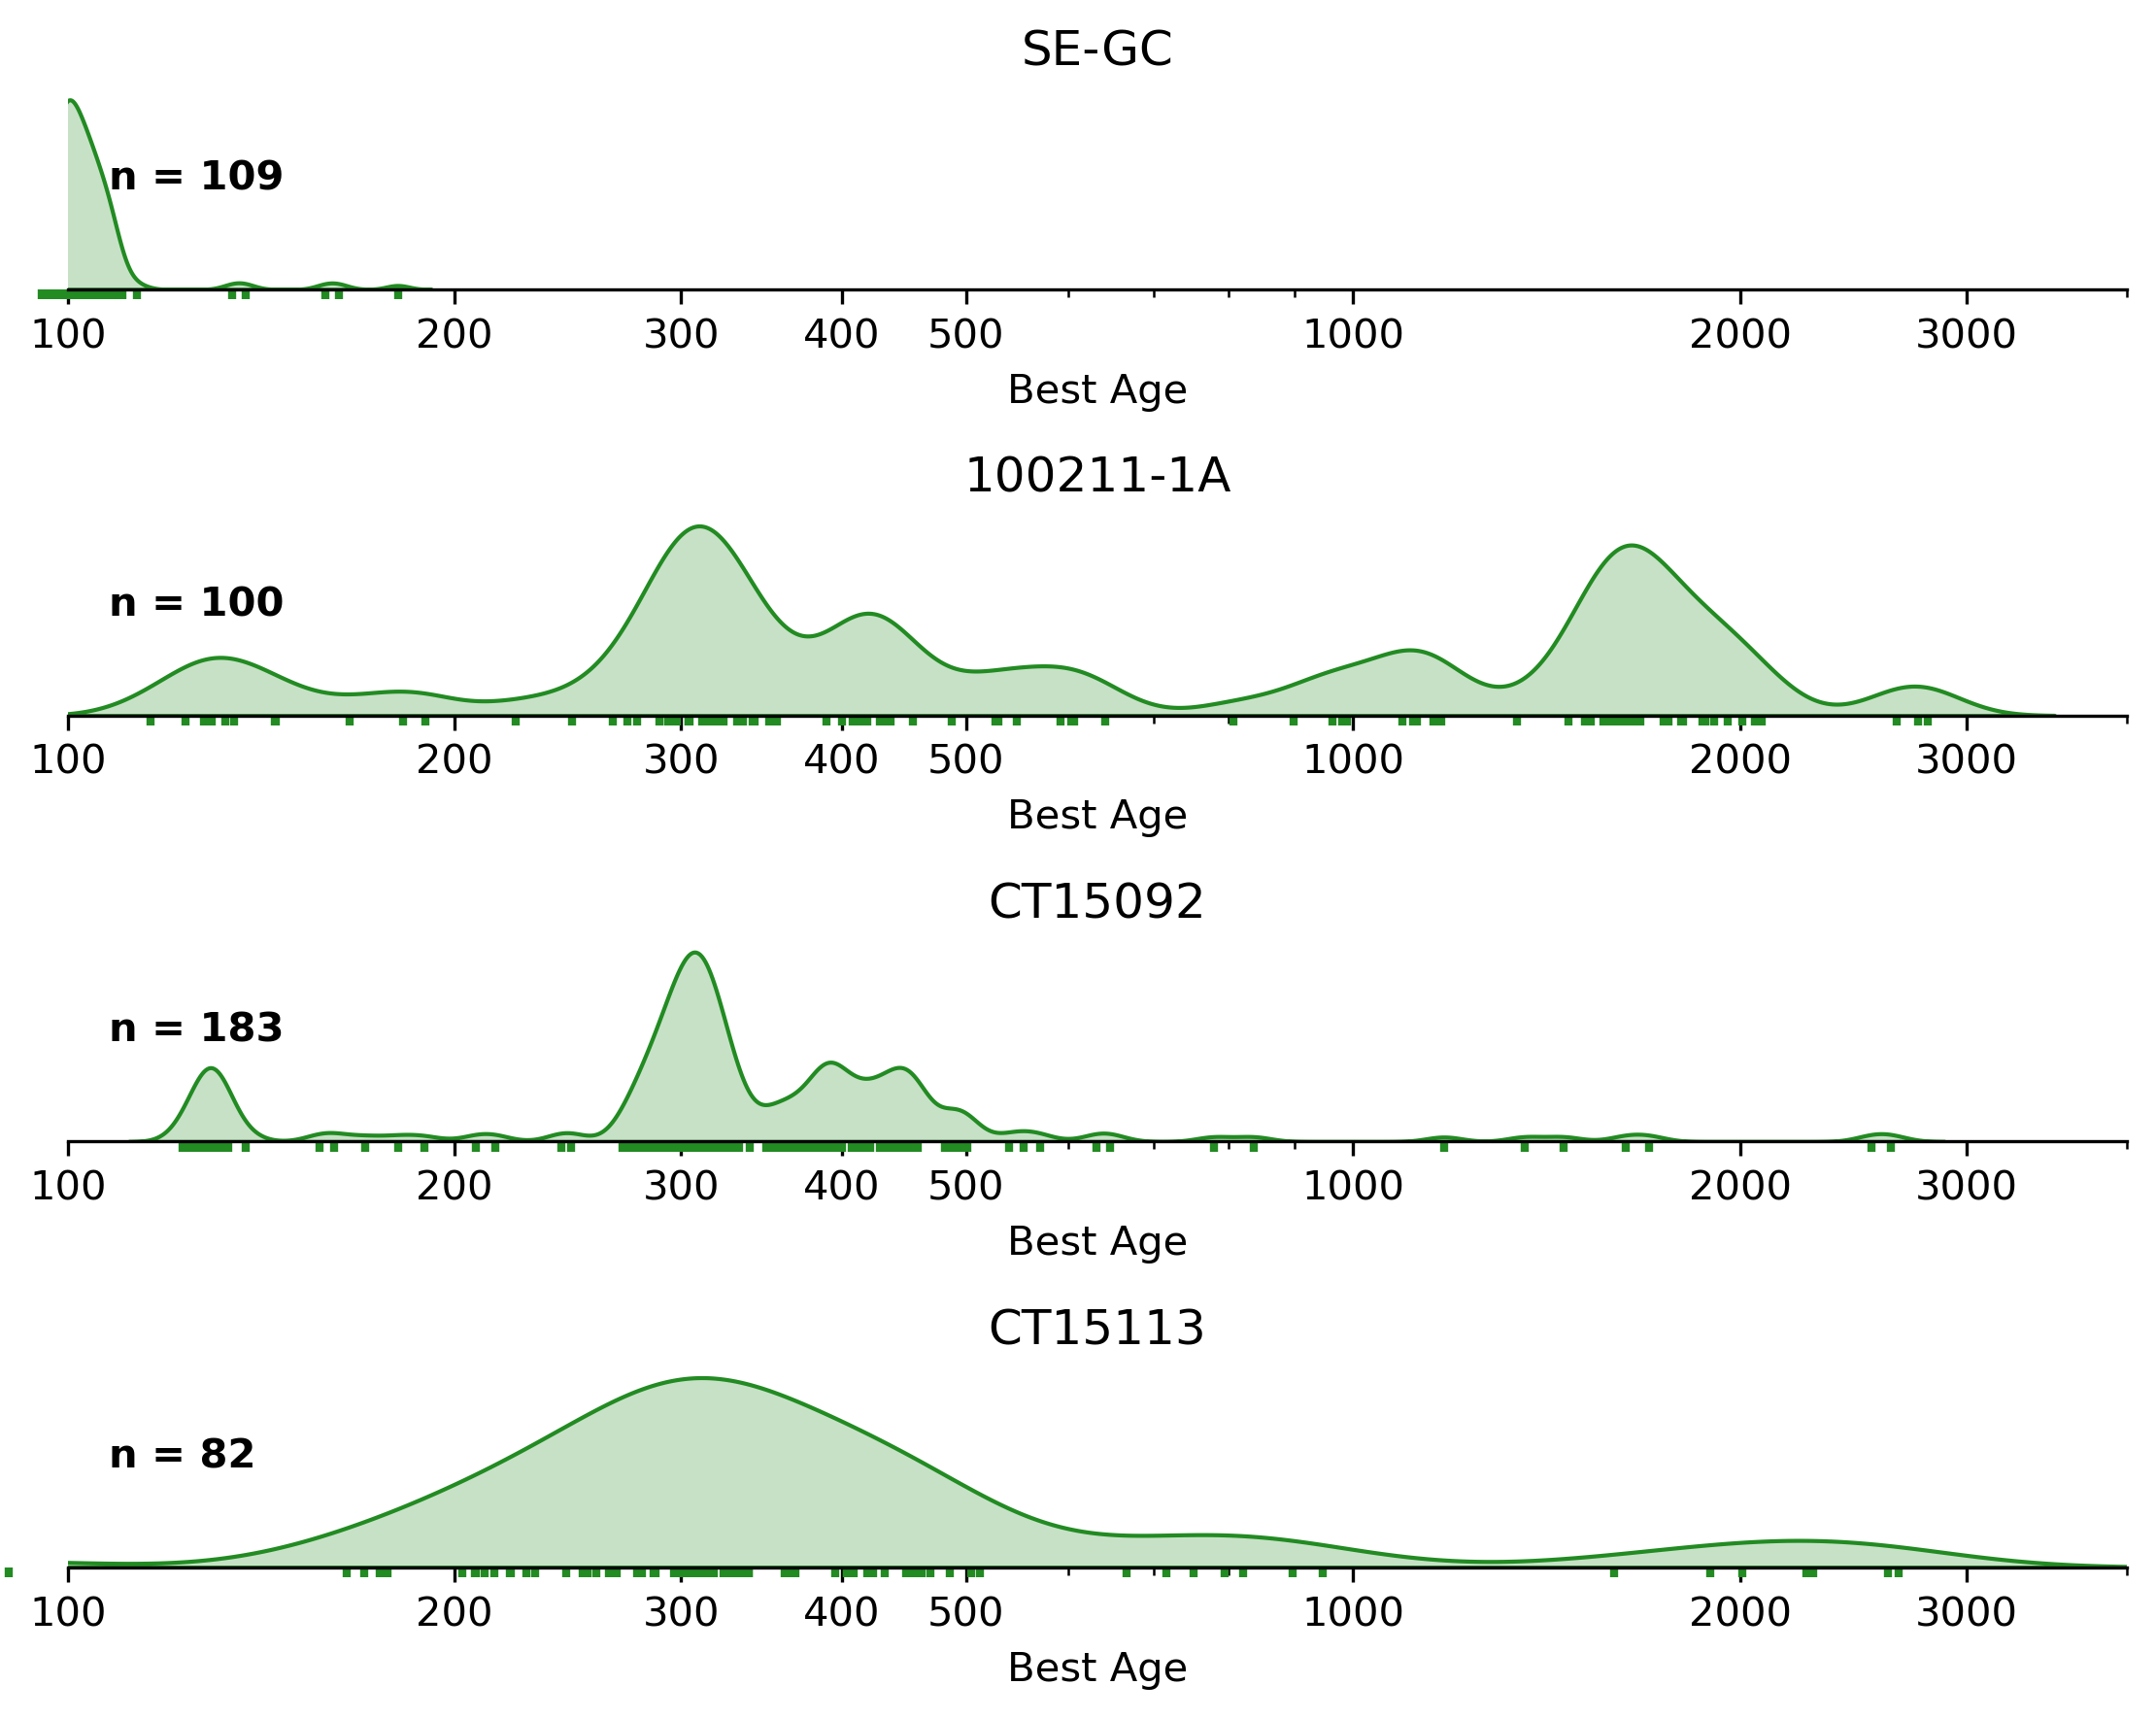

In [5]:
smps = []

for sample in samples:
    ysg = np.min(sample.bestage)
    n = len(sample.bestage)
    modern = sample.color == 'red'

    if (ysg < 140) & (ysg > 60) & (n > 15) & ~modern & ~('F' in sample.name) & ~('W' in sample.name) & ~('ILN' in sample.name):
        sample.color = 'forestgreen'
        smps.append(sample.name)
        print(sample.reported_age)

print(smps)

plot_fault_block(smps,save=True,filename='K.jpg')

all_called = all_called + smps

NW-GC purple collisional
N3 brown collisional
N2 brown convergent
N1 brown collisional
SE-GC forestgreen convergent
K3 blue convergent
N5 purple convergent
NE-GC blue collisional
SW-GC blue collisional
GC41 blue convergent
CT15076 blue collisional
100211-1A forestgreen collisional
100411-5 blue collisional
CT15092 forestgreen collisional
CT130918-2A brown extensional
100211-9A purple collisional
CT130918-9A purple collisional
CT130919-5A blue collisional
AB0913 blue convergent
AB0926 blue extensional
CT15113 forestgreen collisional


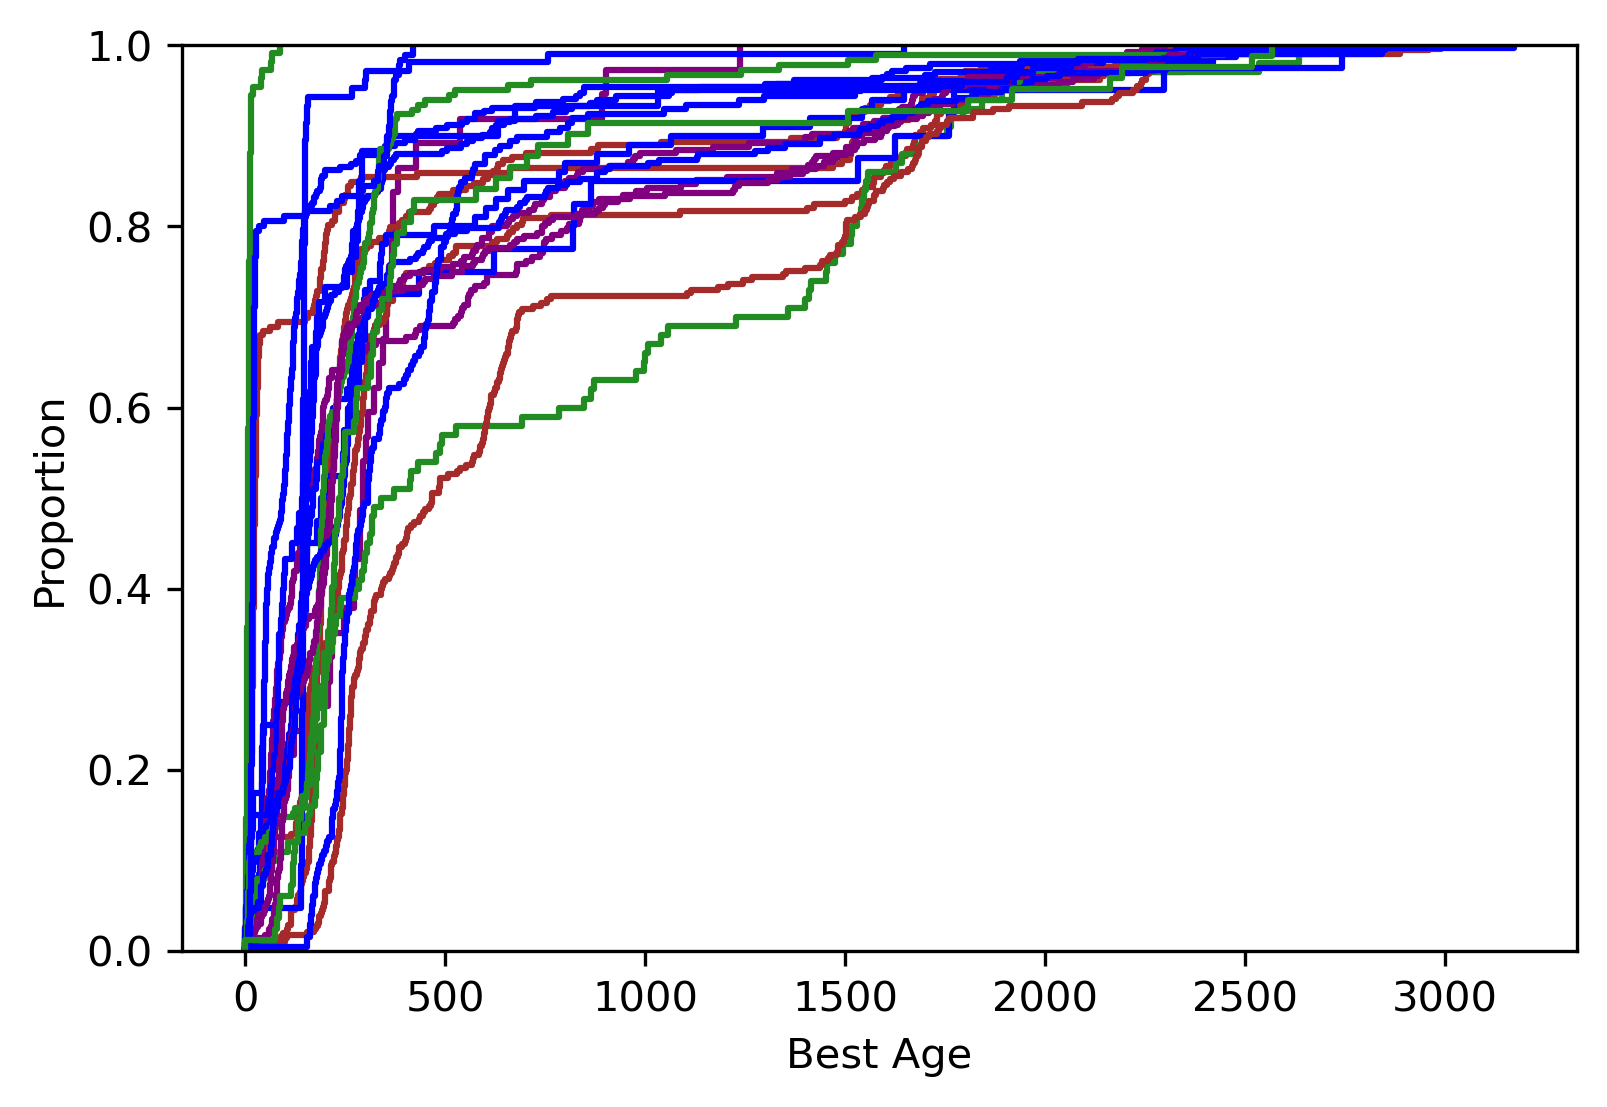

In [6]:
smps_all = [smp for smp in samples if smp.name in all_called]

fig,axs = plt.subplots(1,dpi=300)

for sample in smps_all:
    sample.cawood_classify()
    sample.cad(ax=axs,color=sample.color,depage='youngest')
    print(sample.name,sample.color,sample.cawood)


CT15076 157.27862657459315
100211-1A 115.95142395810946
100411-5 164.11838779991572
CT15092 122.76332959503134
CT130918-2A 377.01370378346786
100211-9A 222.1069009466521
No 3 ages overlap at 2 sigma. Defaulting to 3 youngest ages
3 grains at 2 sigma did not succeed. Trying 2 grains at 1 sigma
CT15099 284.65222940685084
CT130918-9A 215.1610925293031
CT130919-5A 171.3716389317476
CT15082 199.15122710086146
AB0913 165.603612237027
AB0926 0.04604504
CT130919-8A 162.68043851651254
No 3 ages overlap at 2 sigma. Defaulting to 3 youngest ages
3 grains at 2 sigma did not succeed. Trying 2 grains at 1 sigma
CT15127 302.49150662003126
CT15113 89.94131049740437


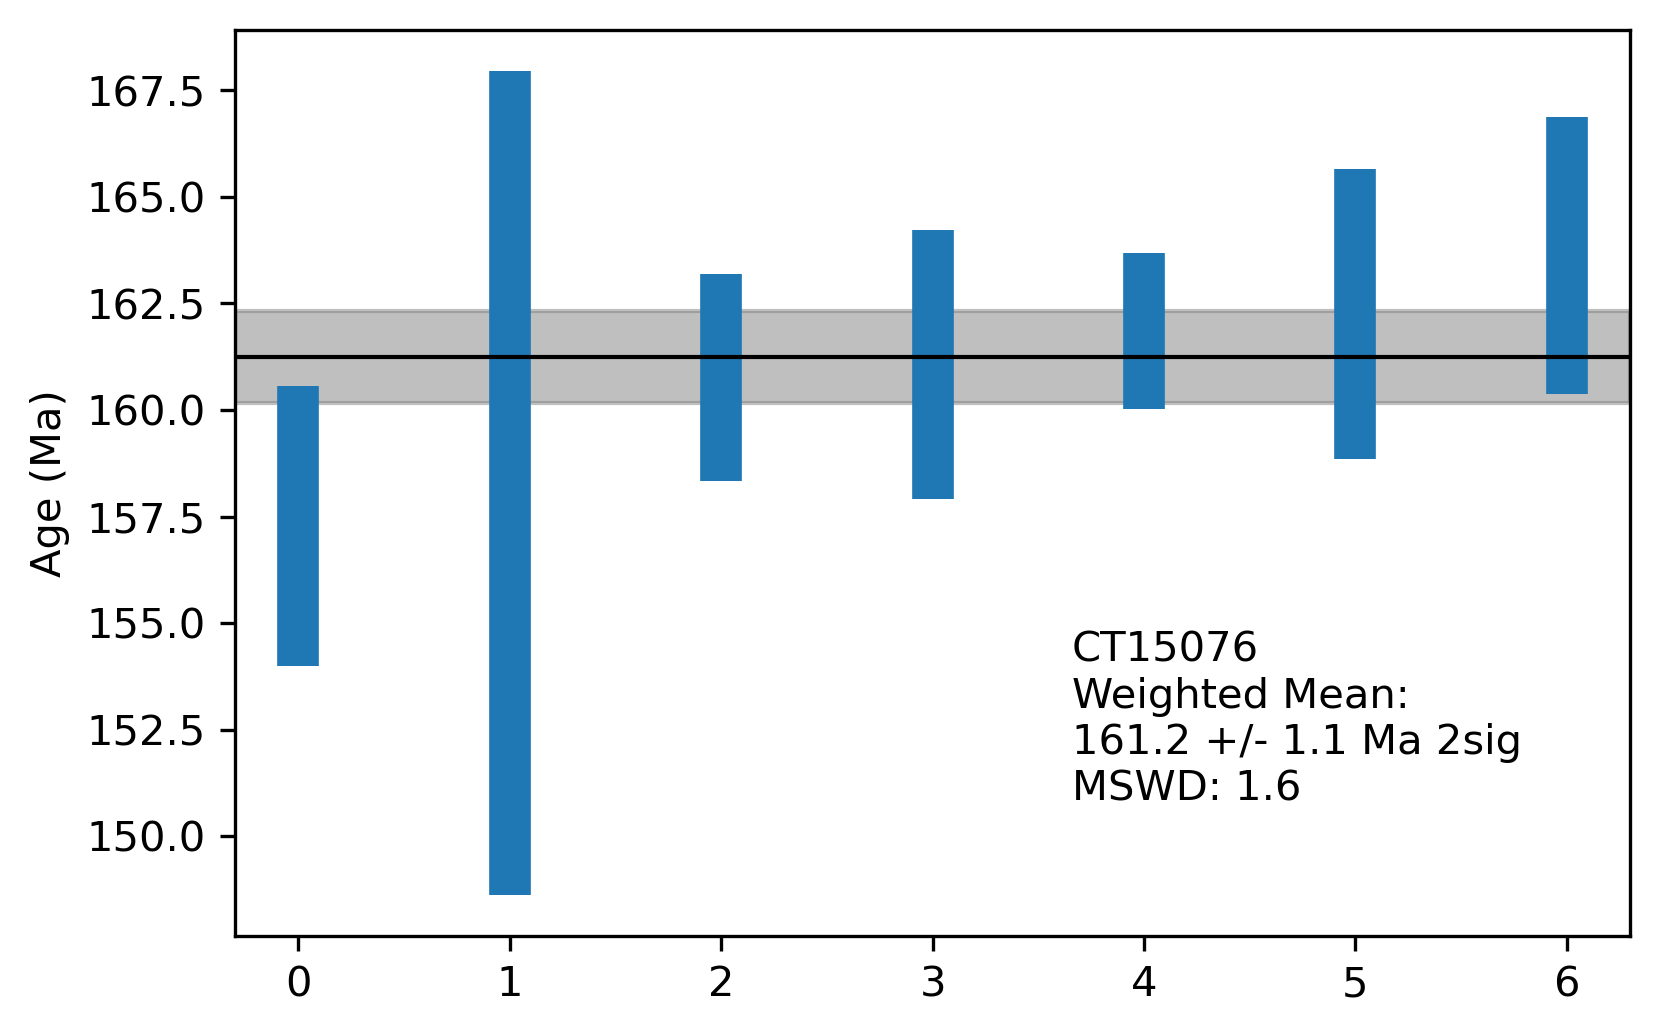

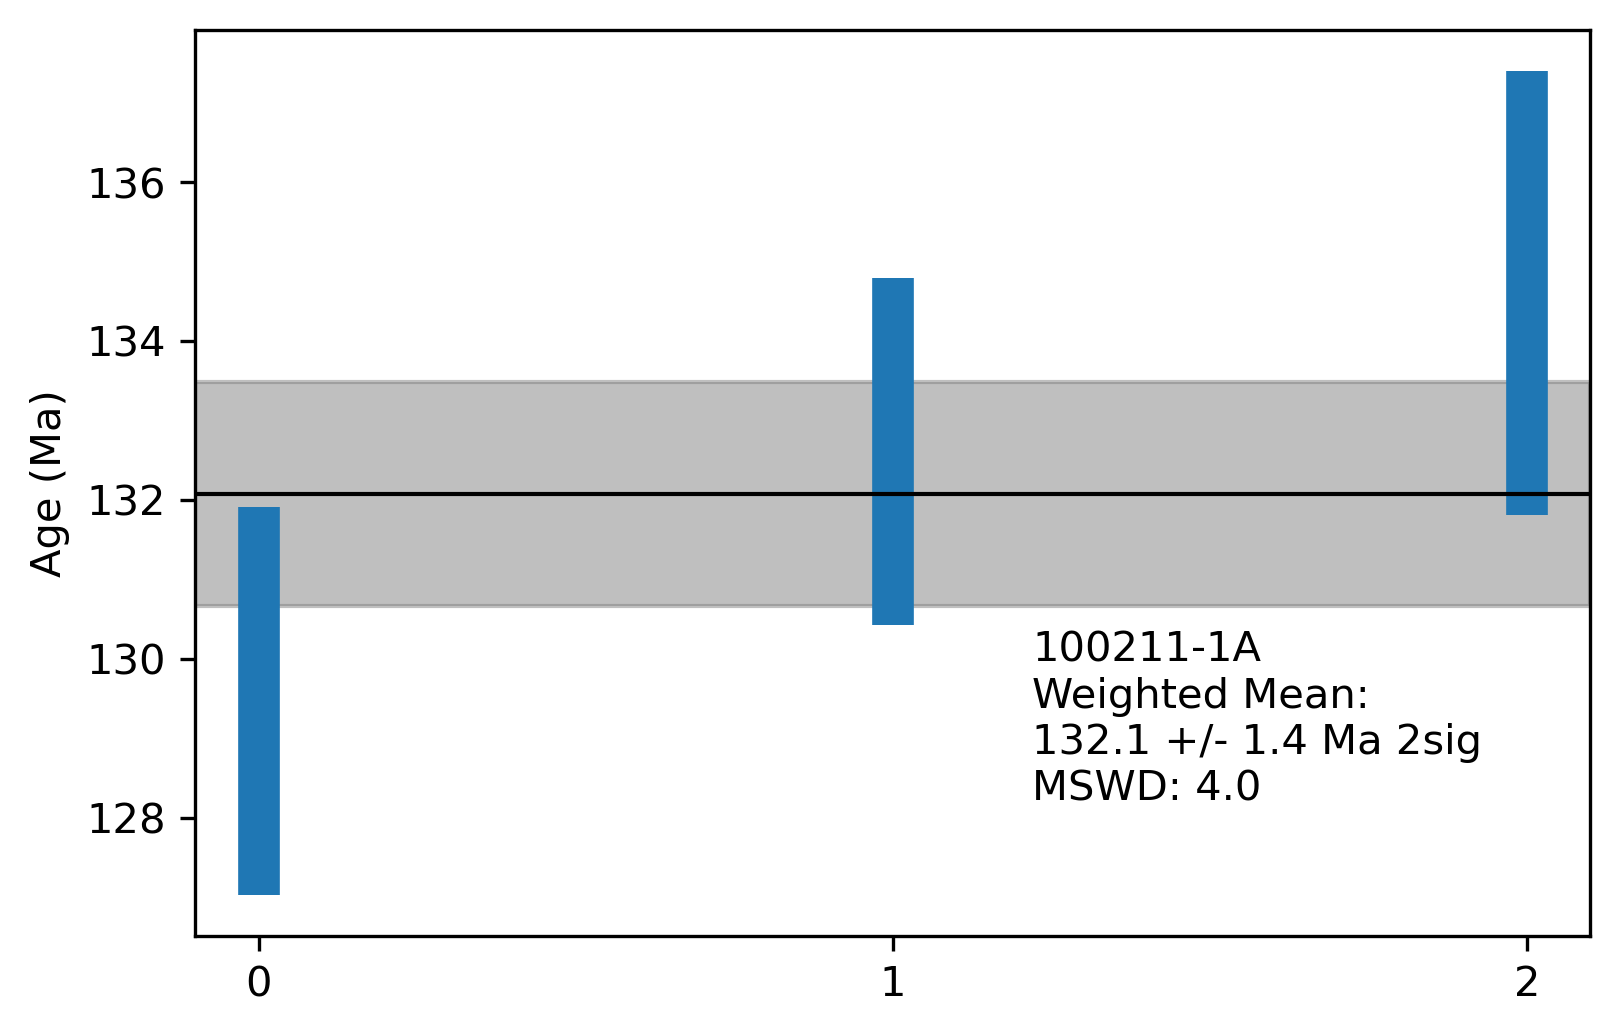

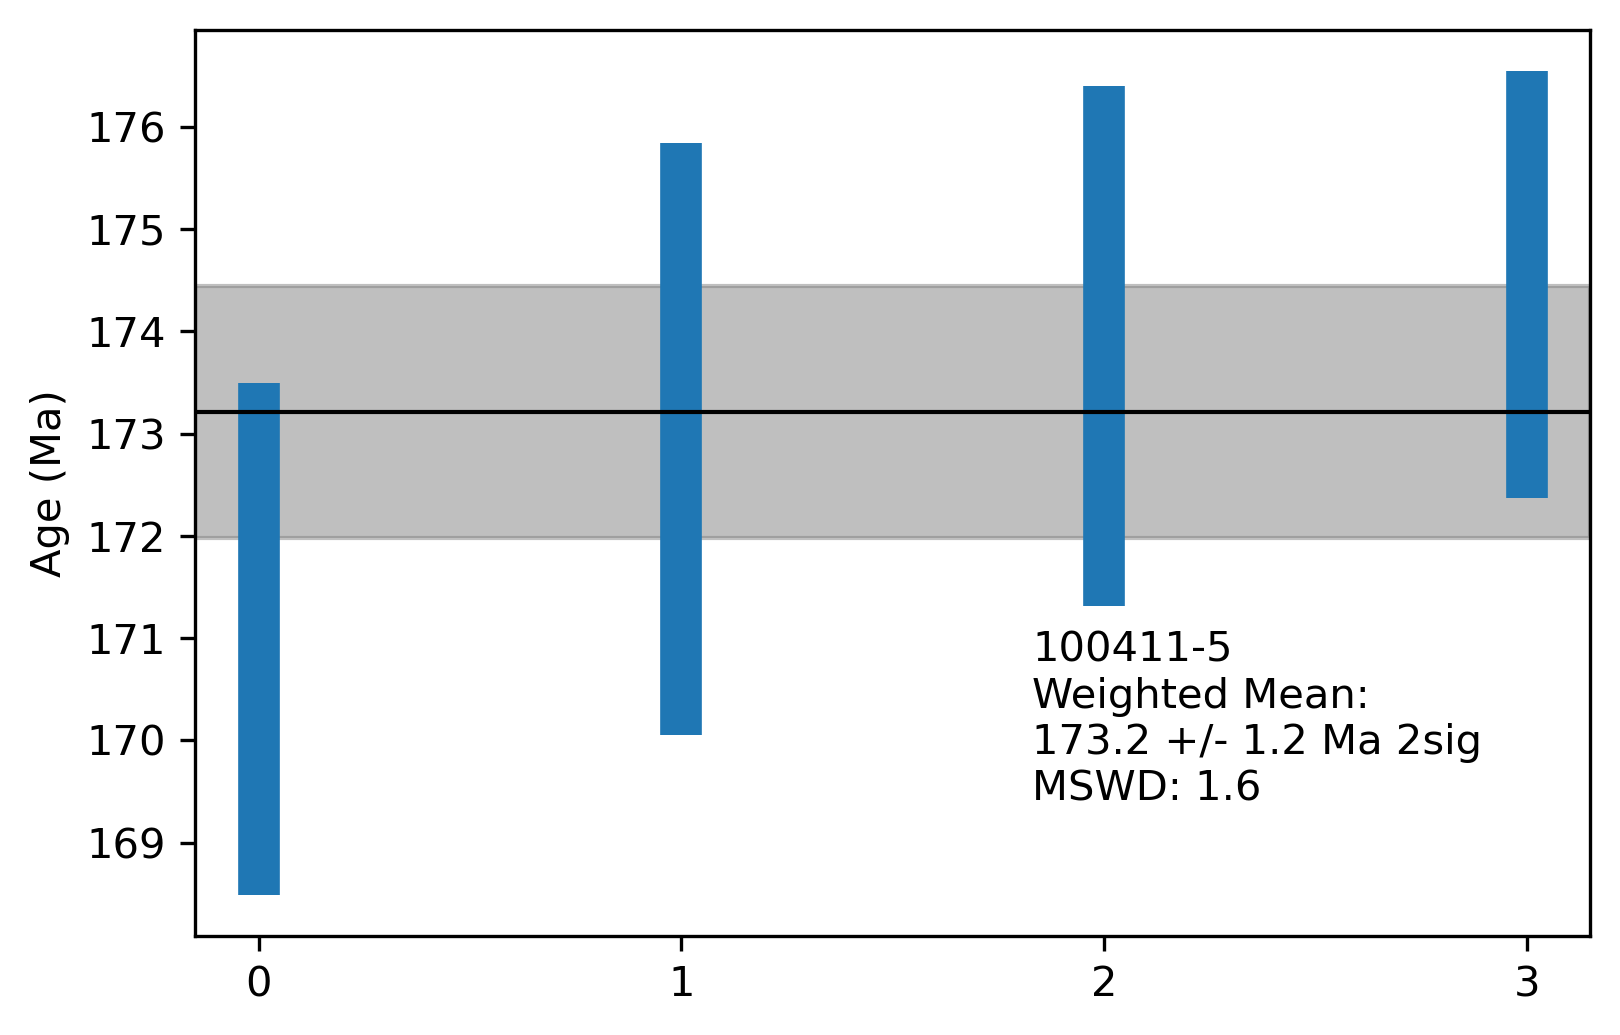

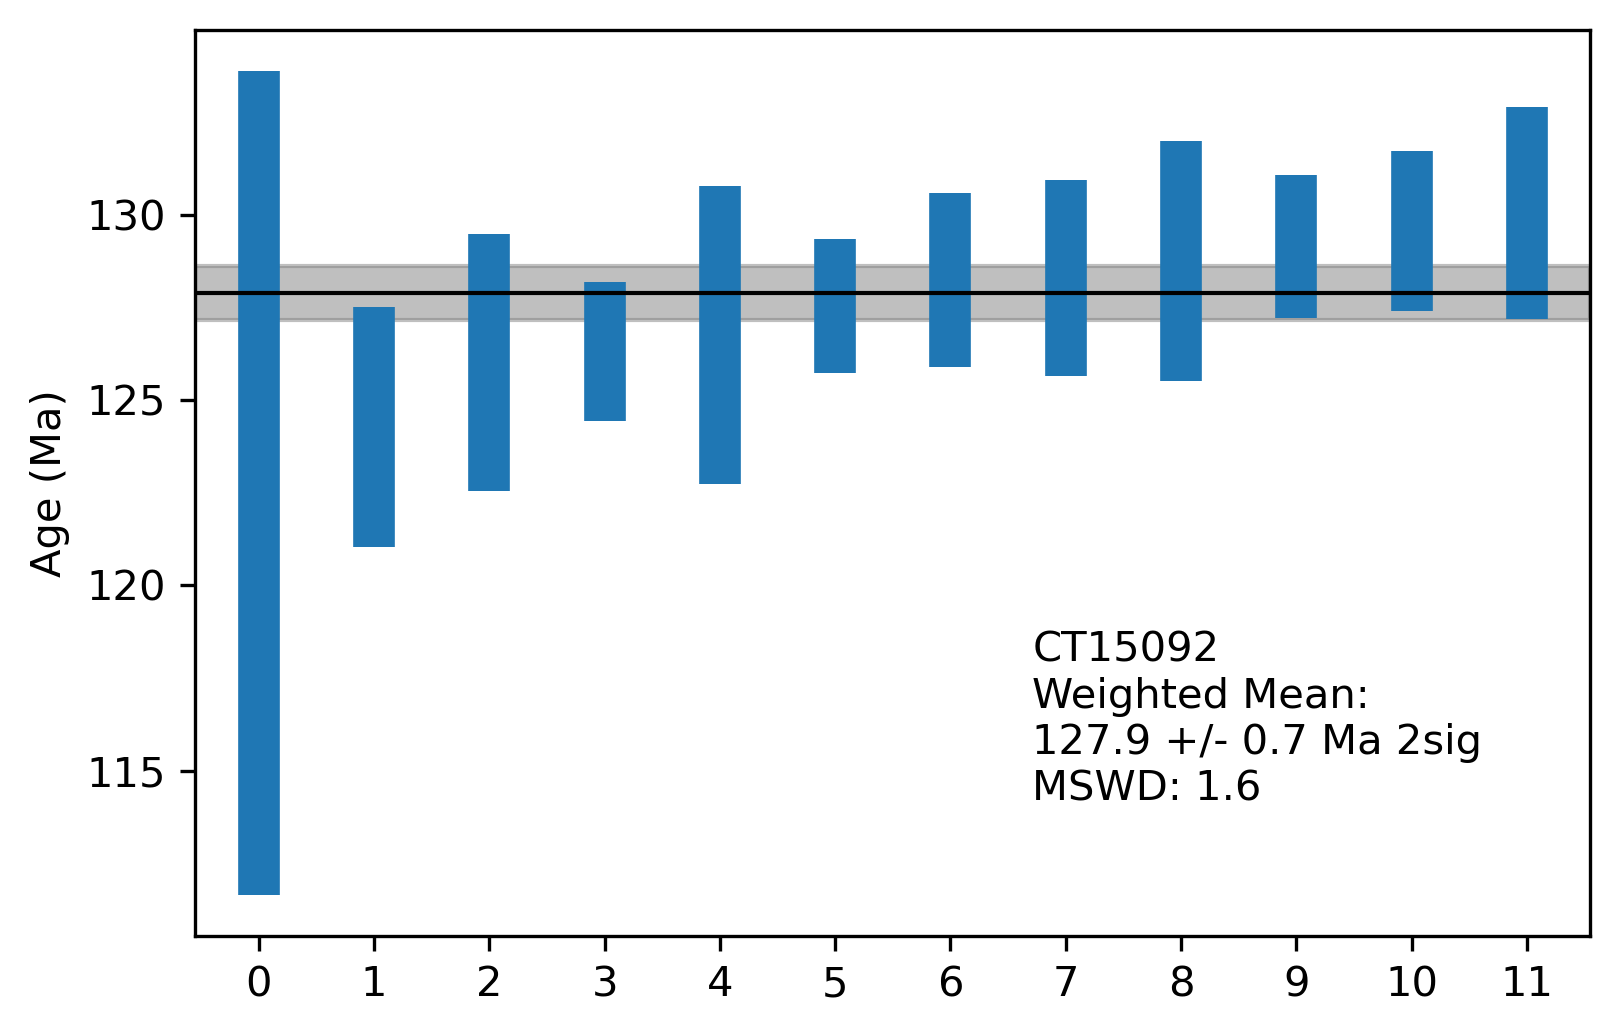

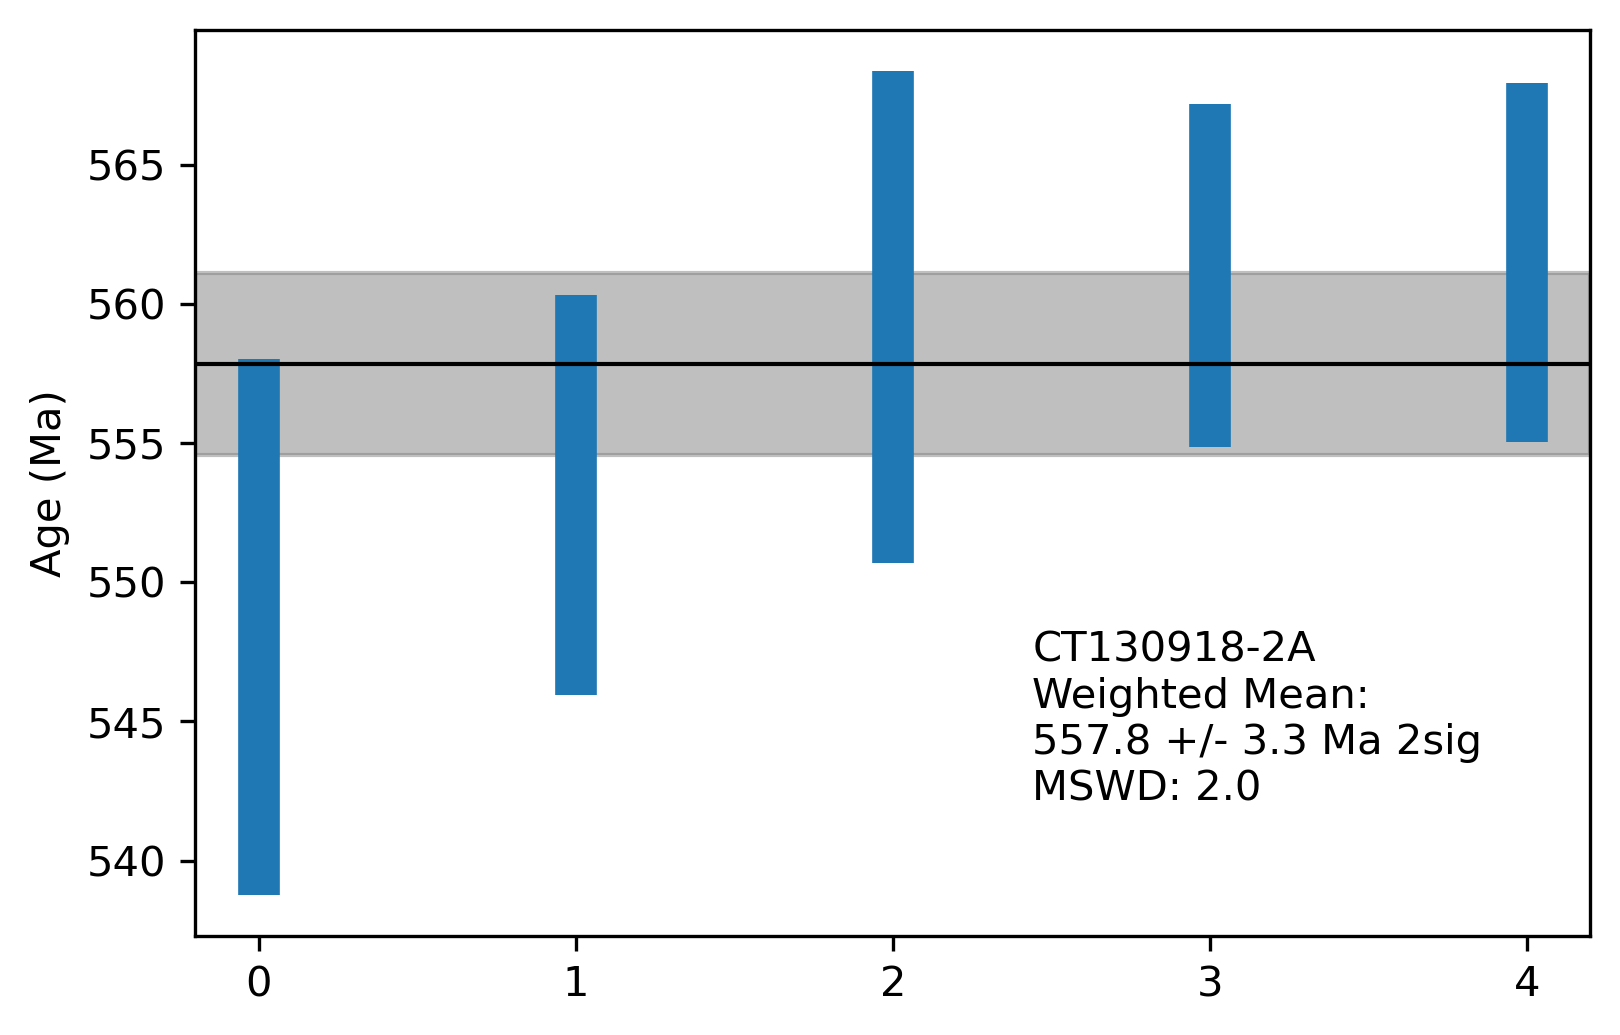

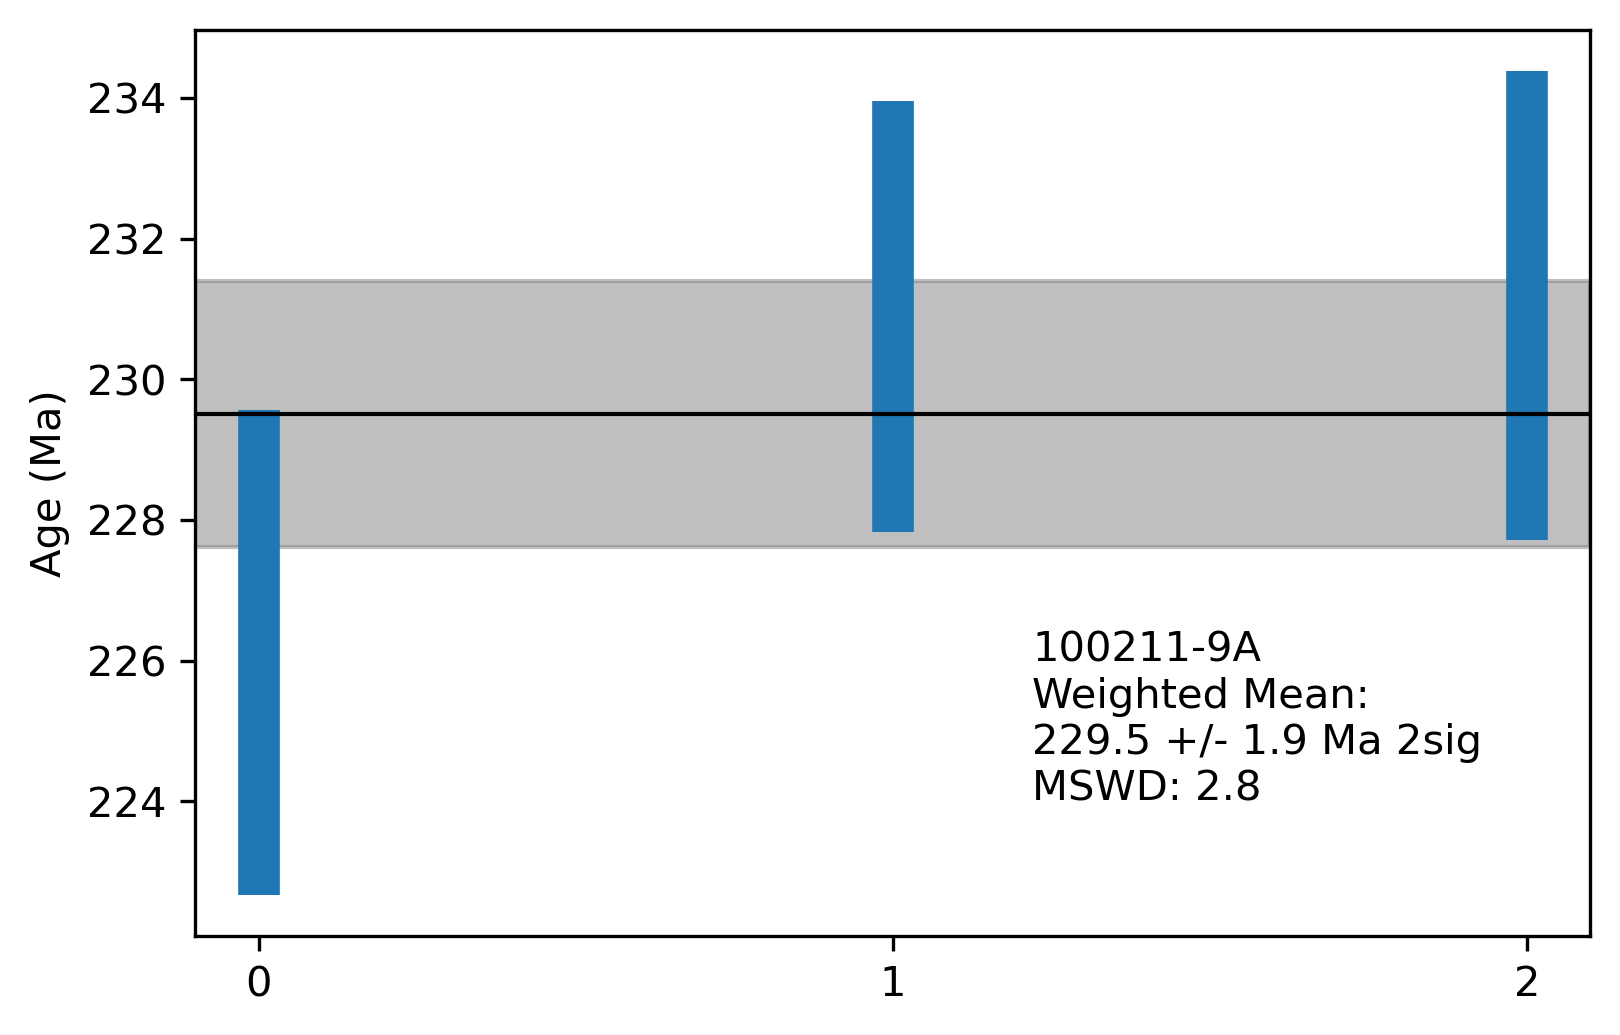

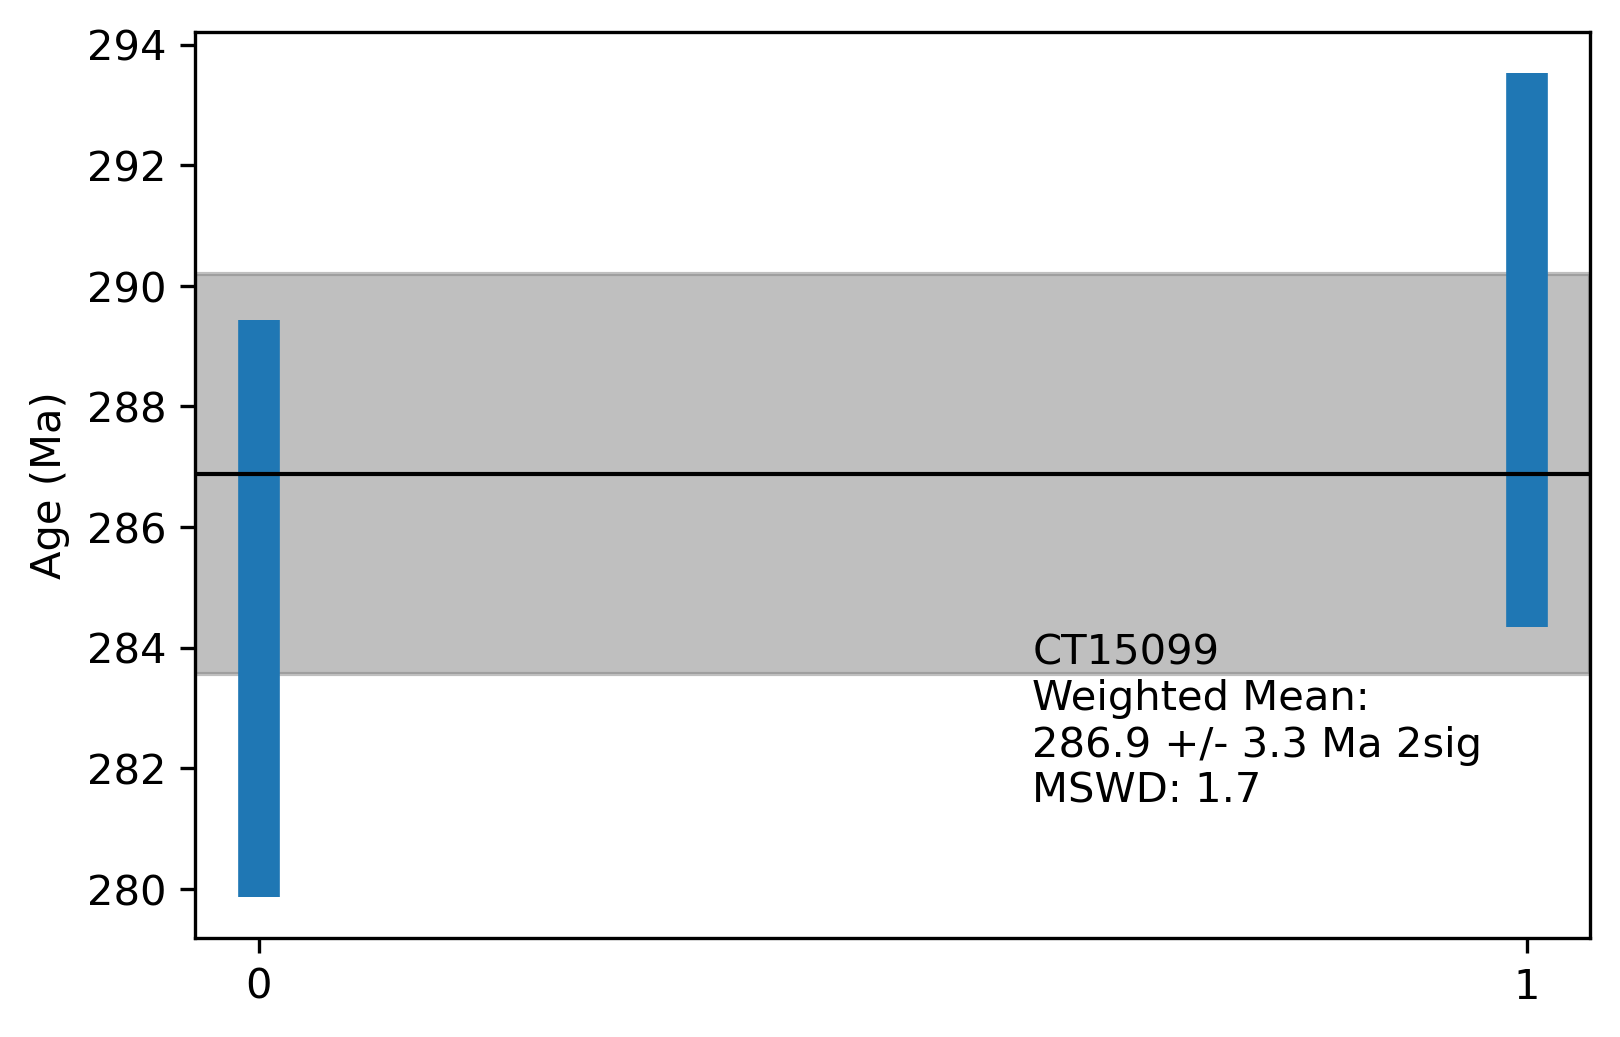

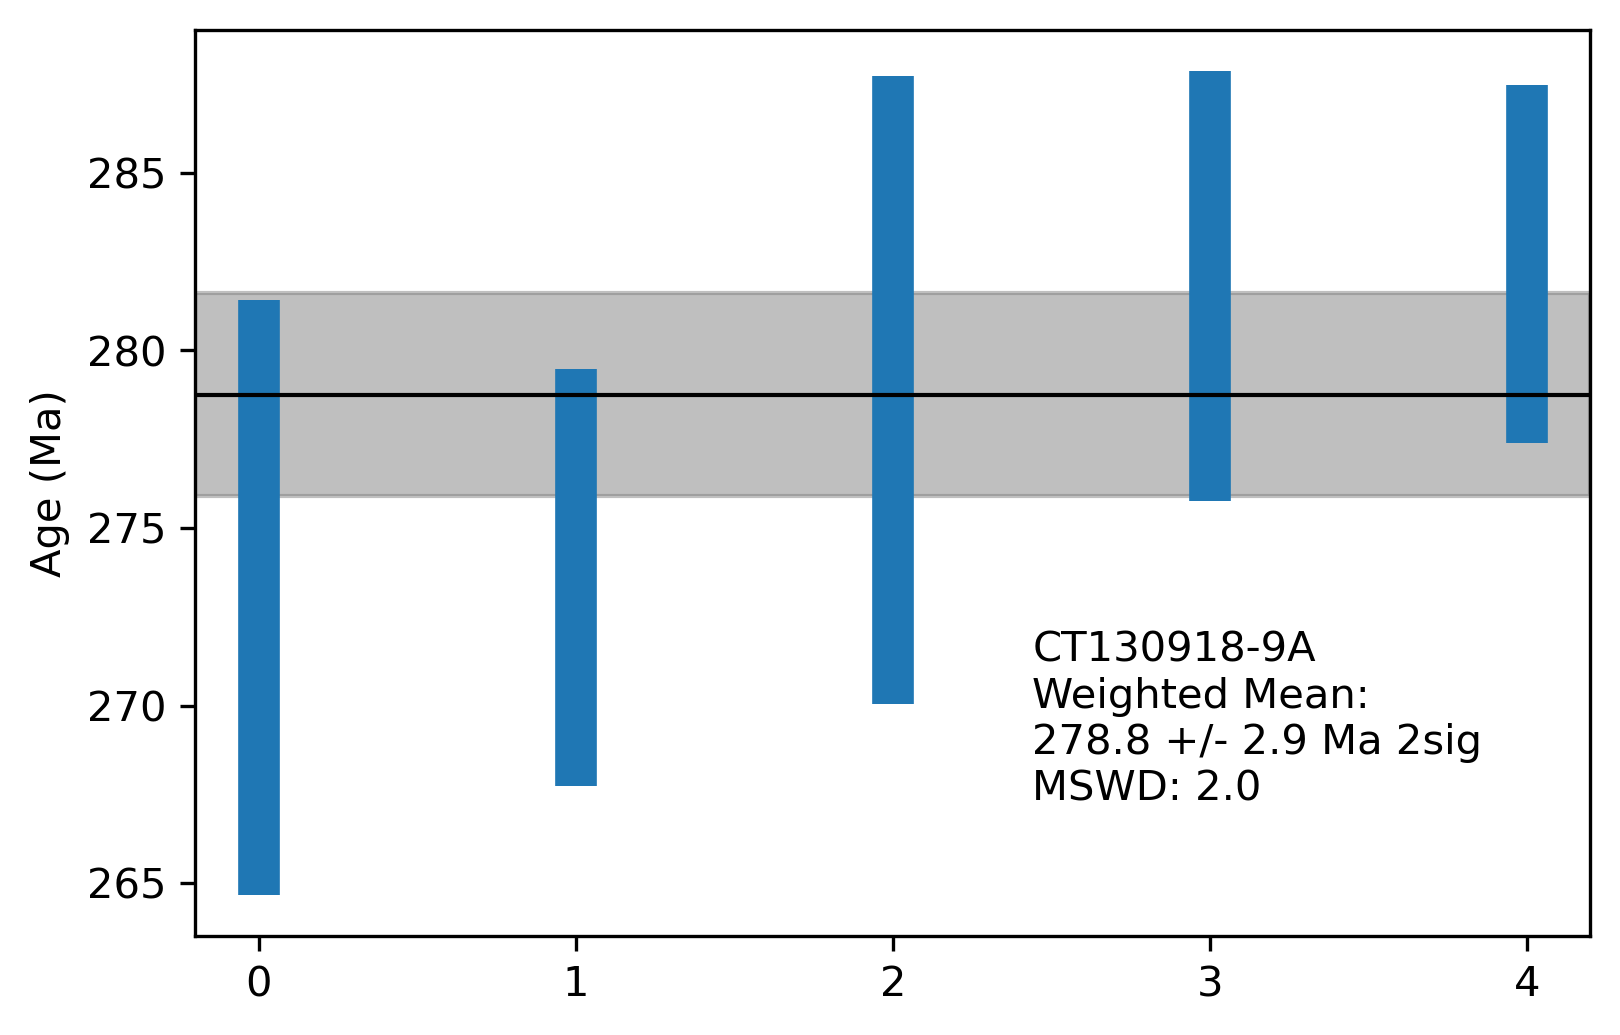

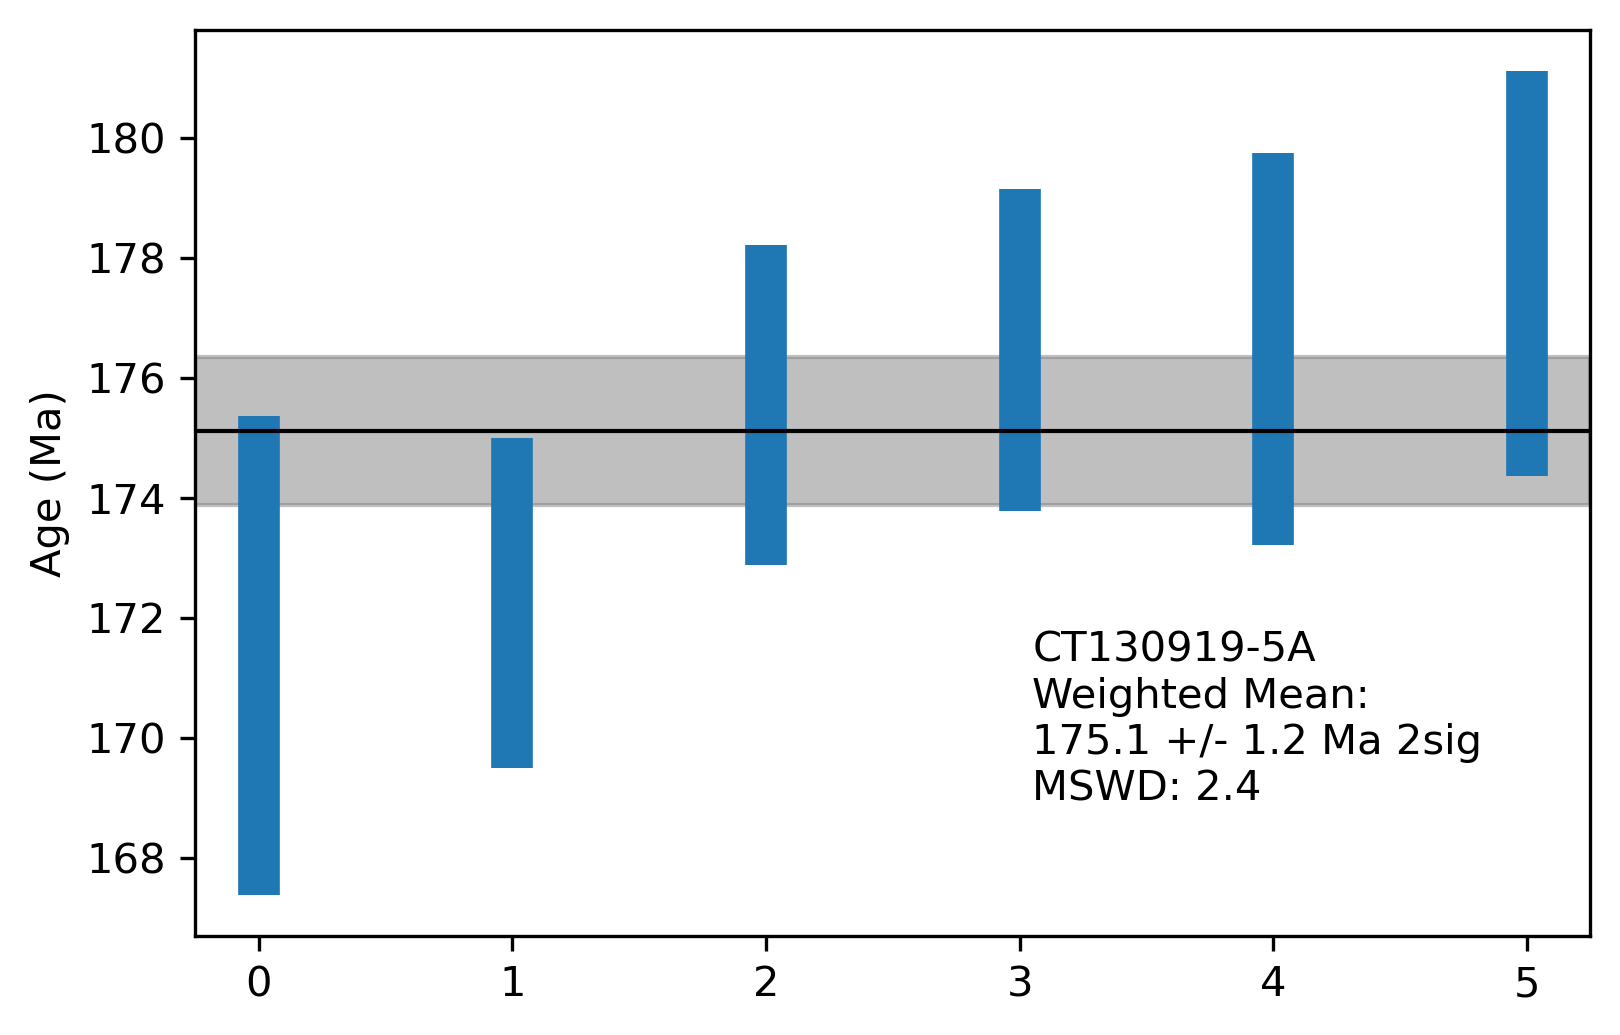

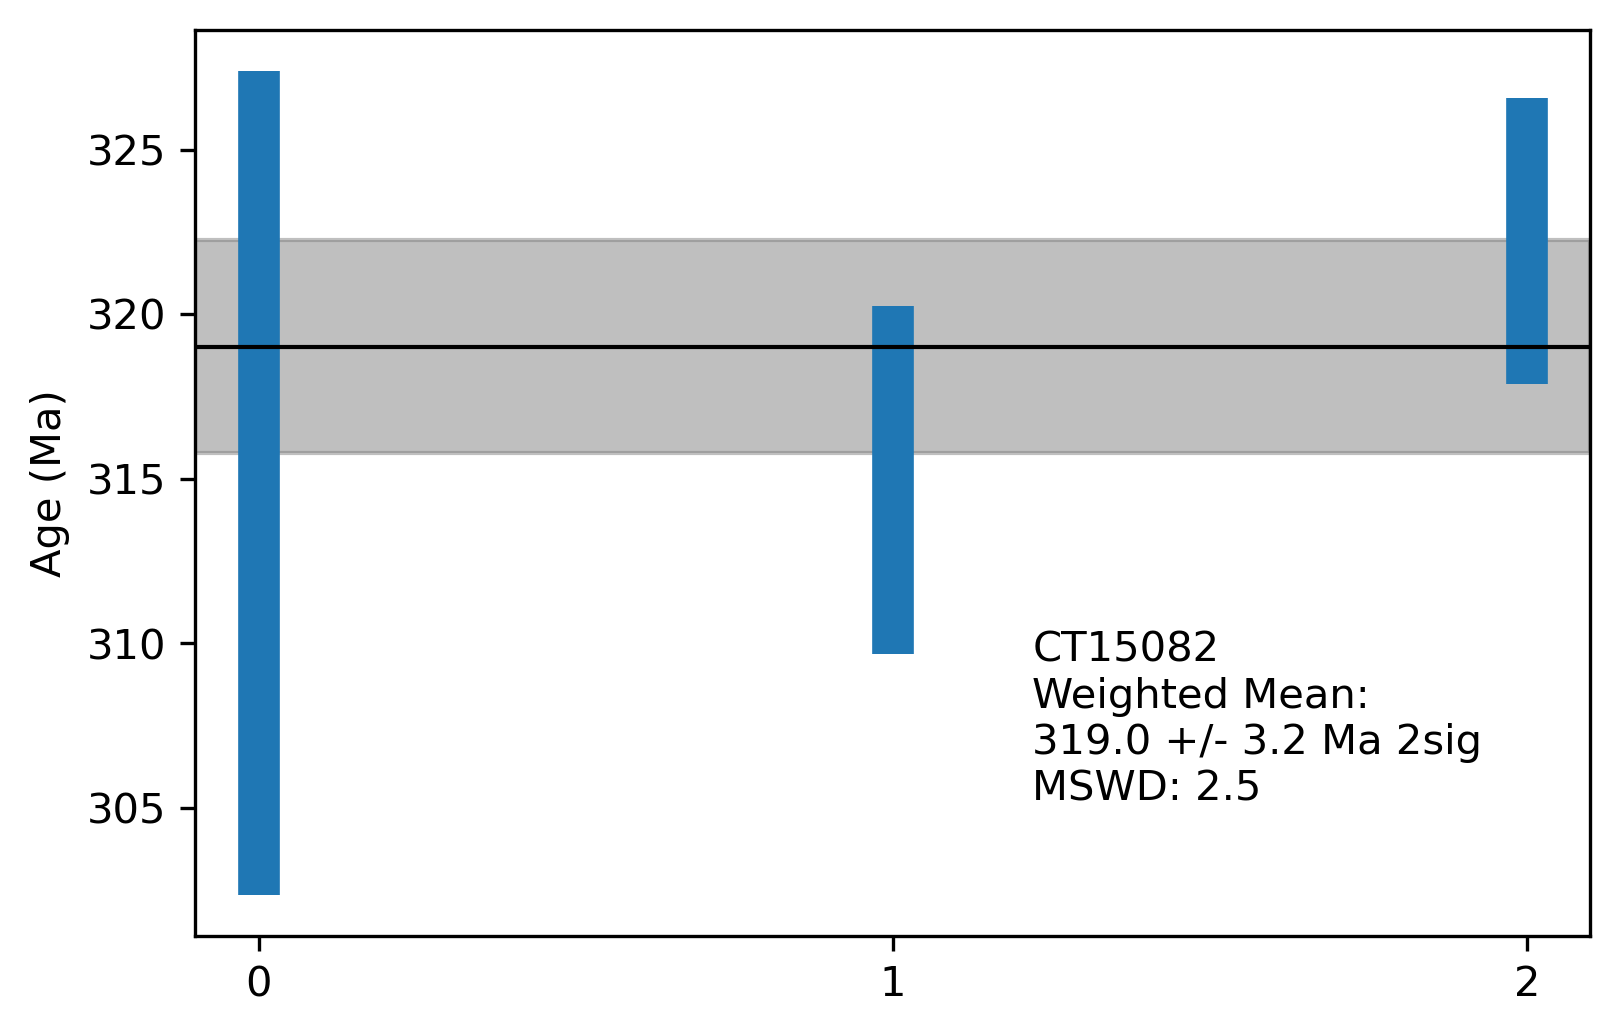

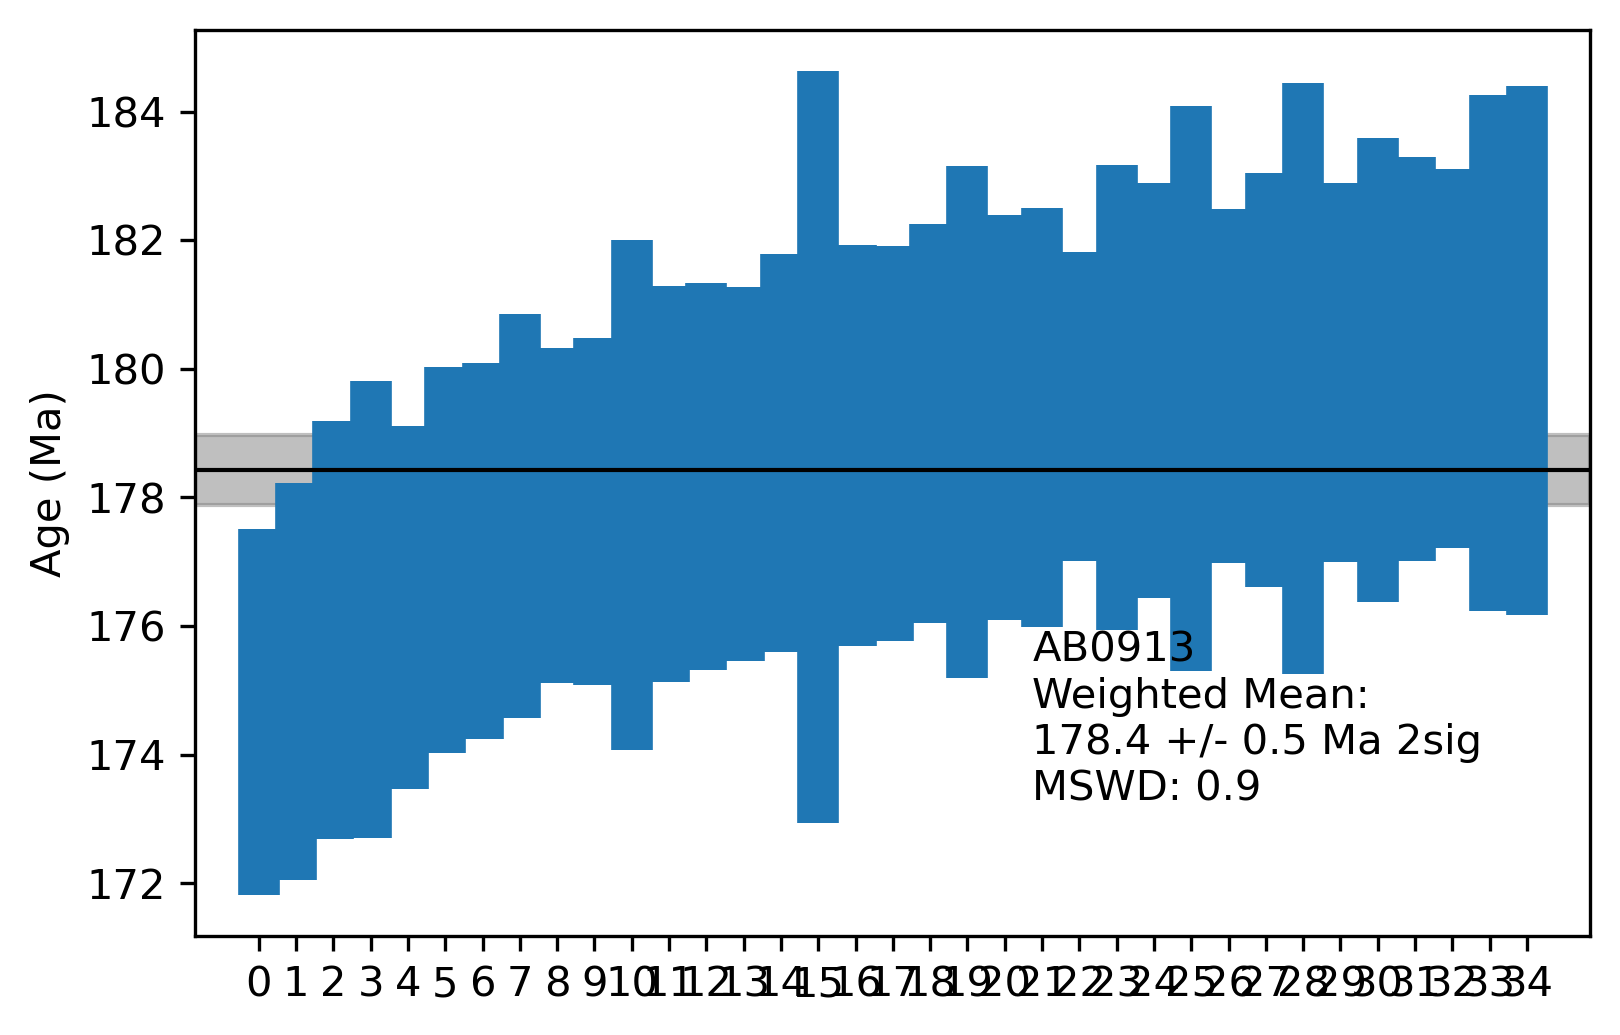

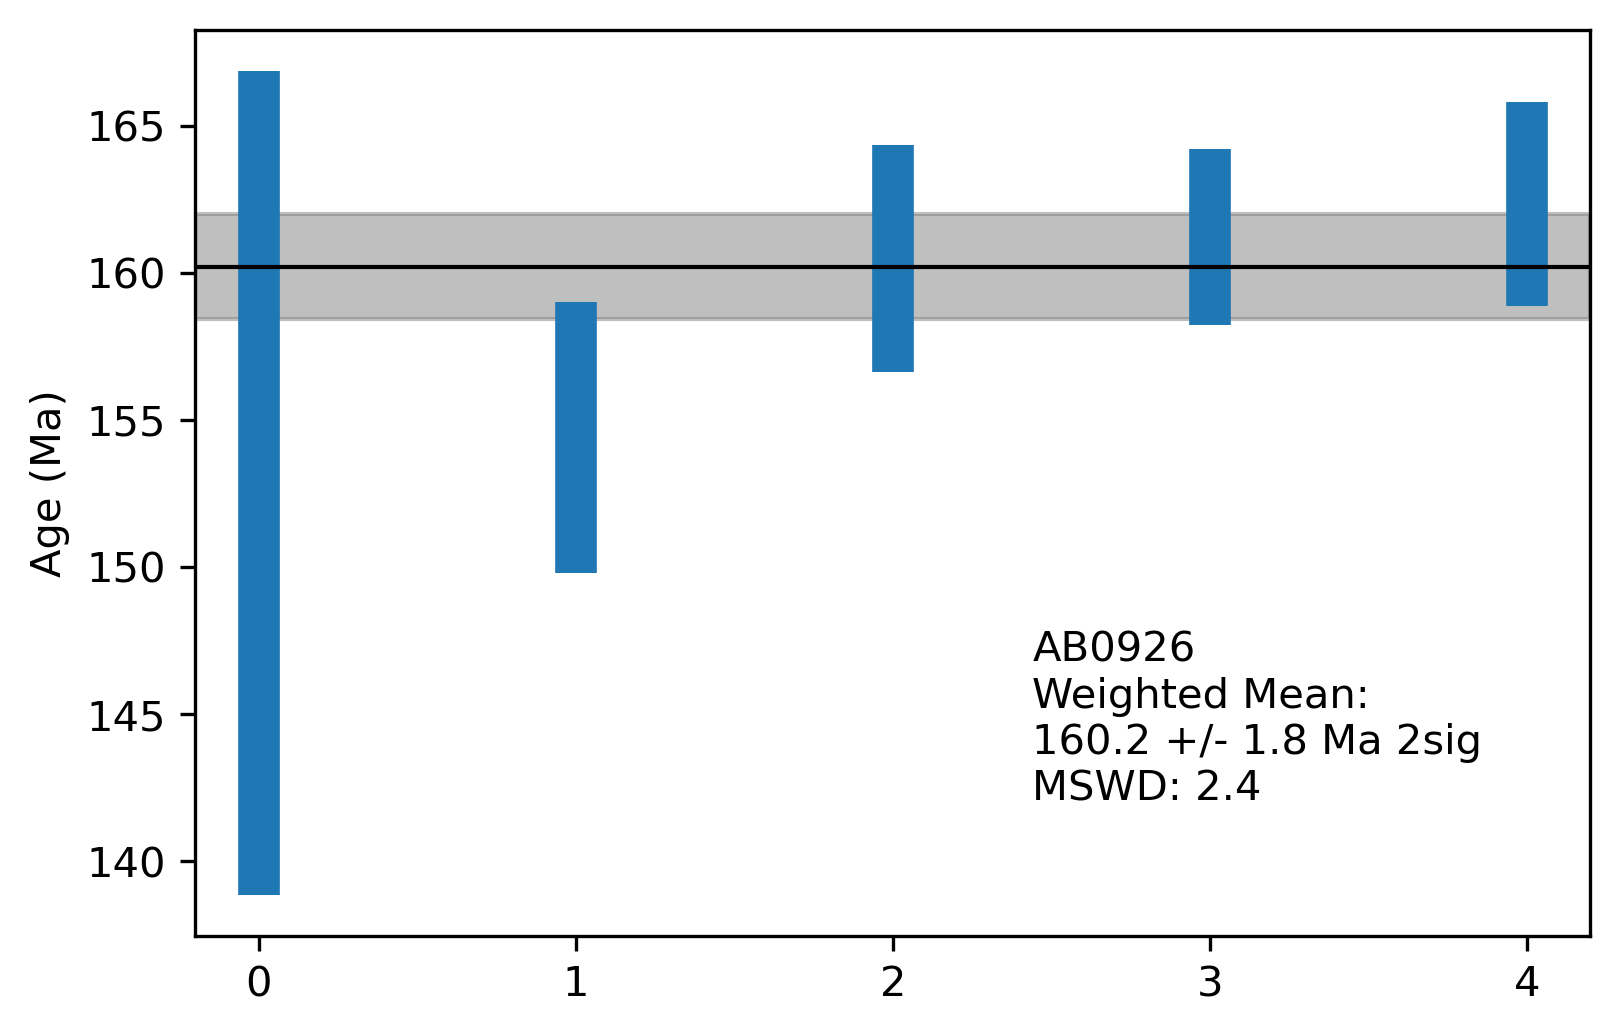

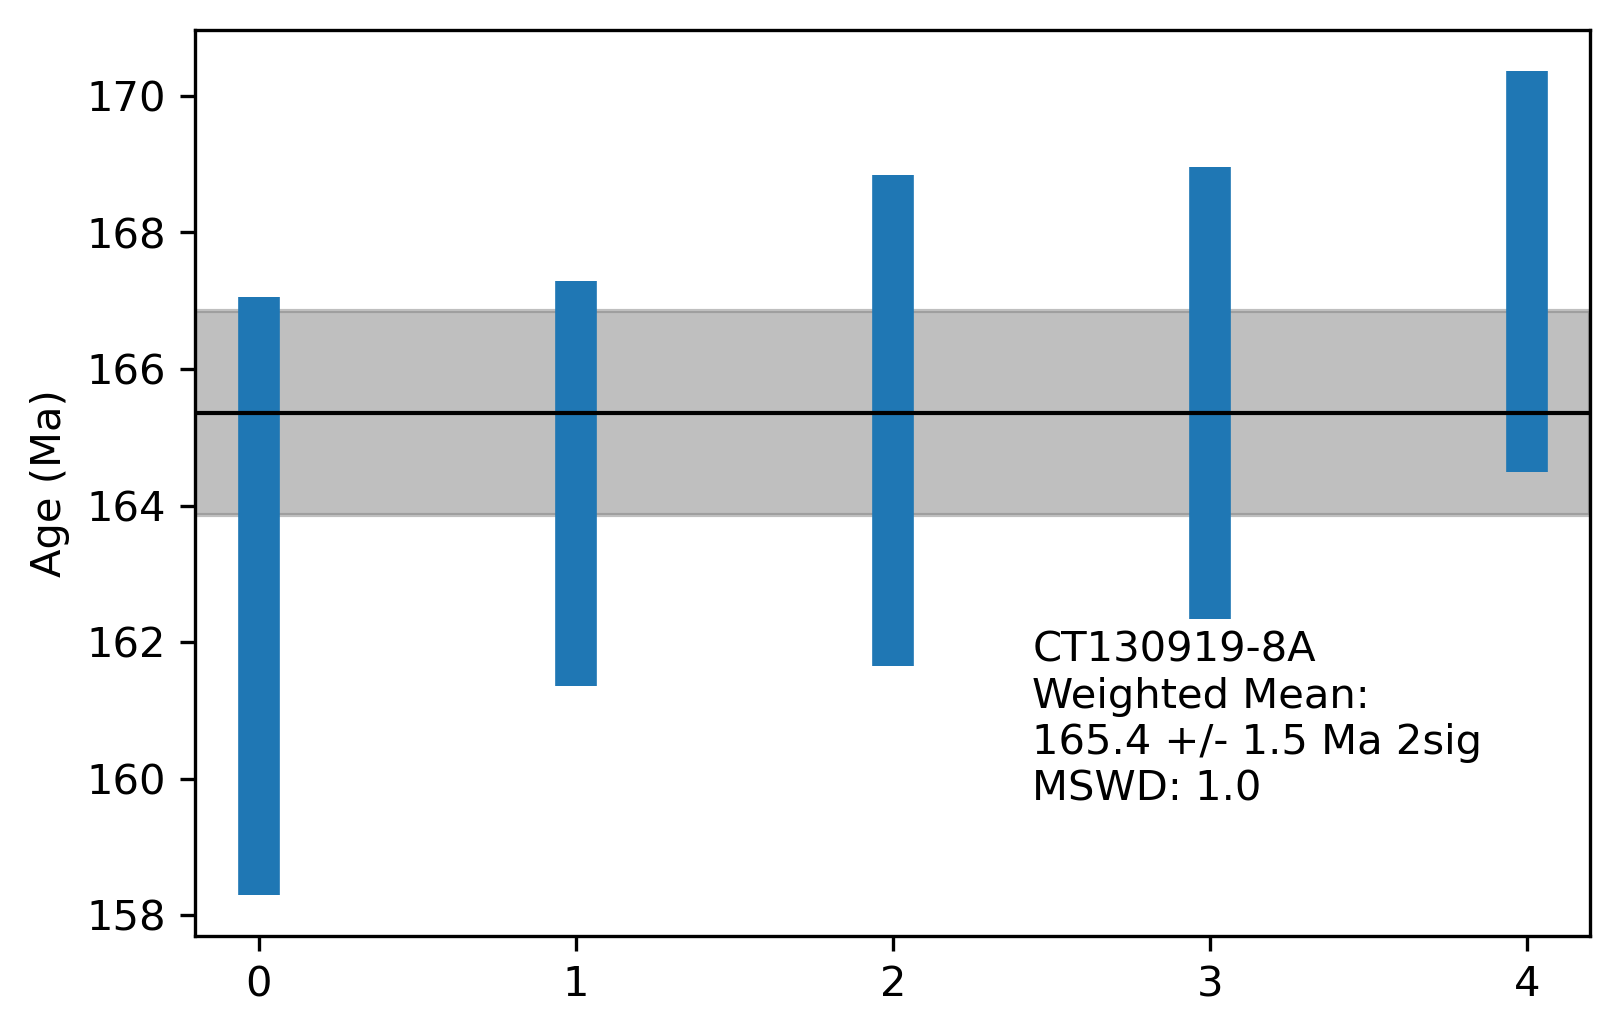

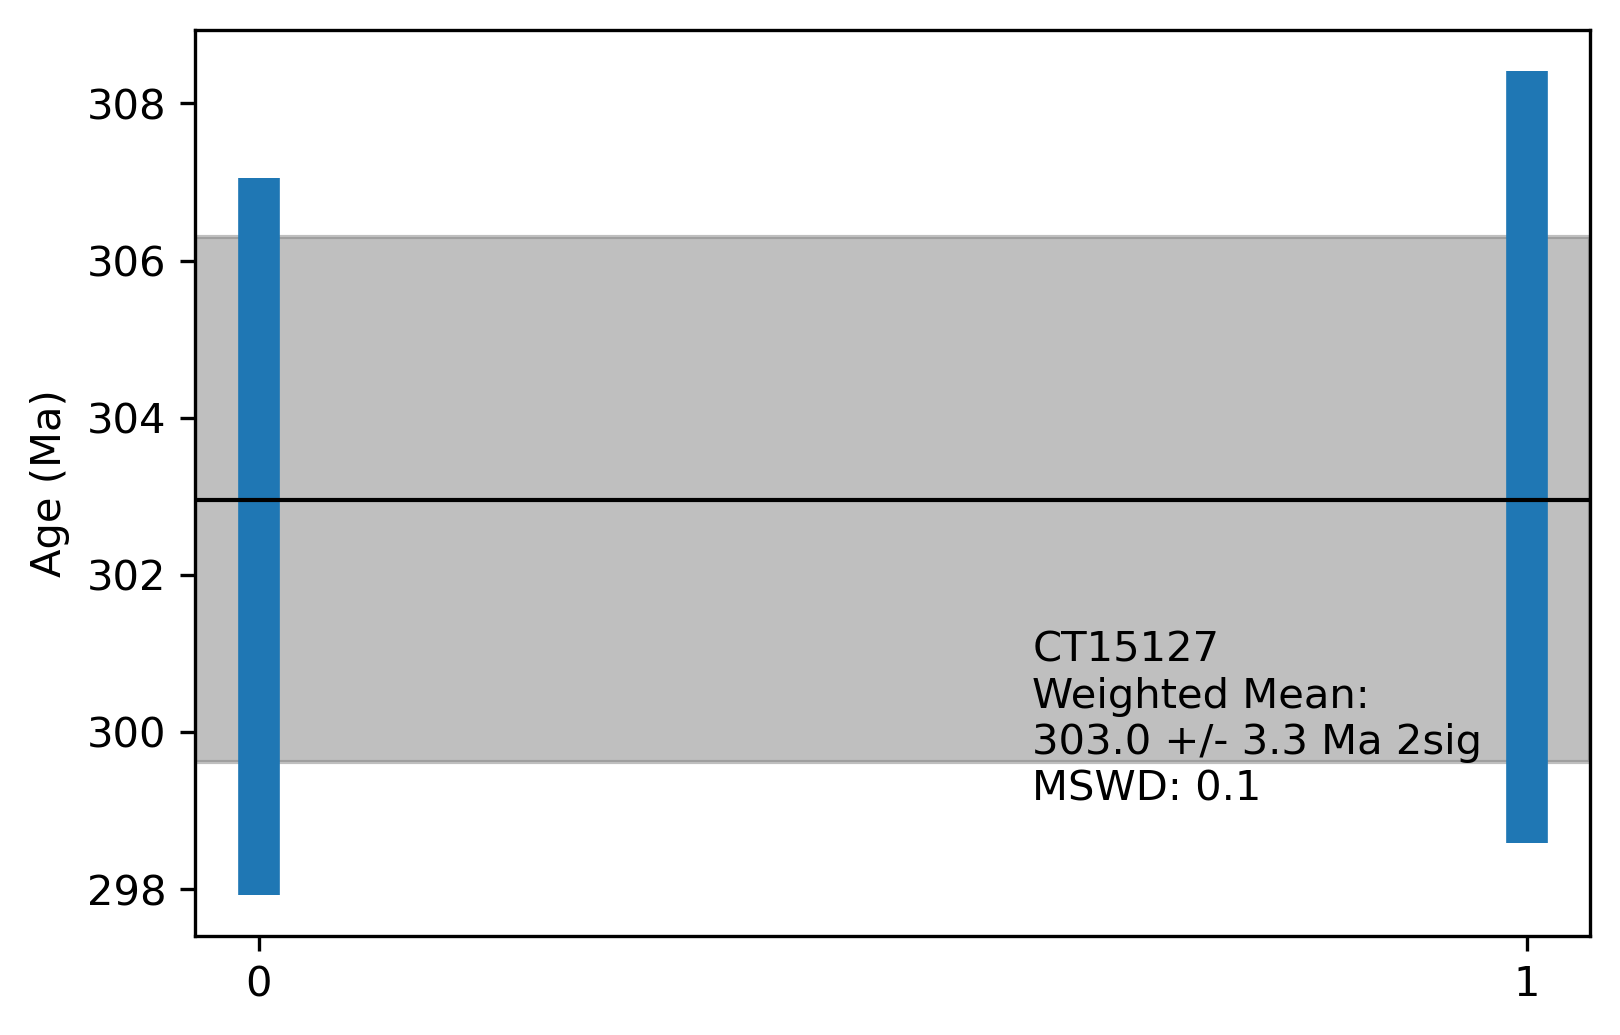

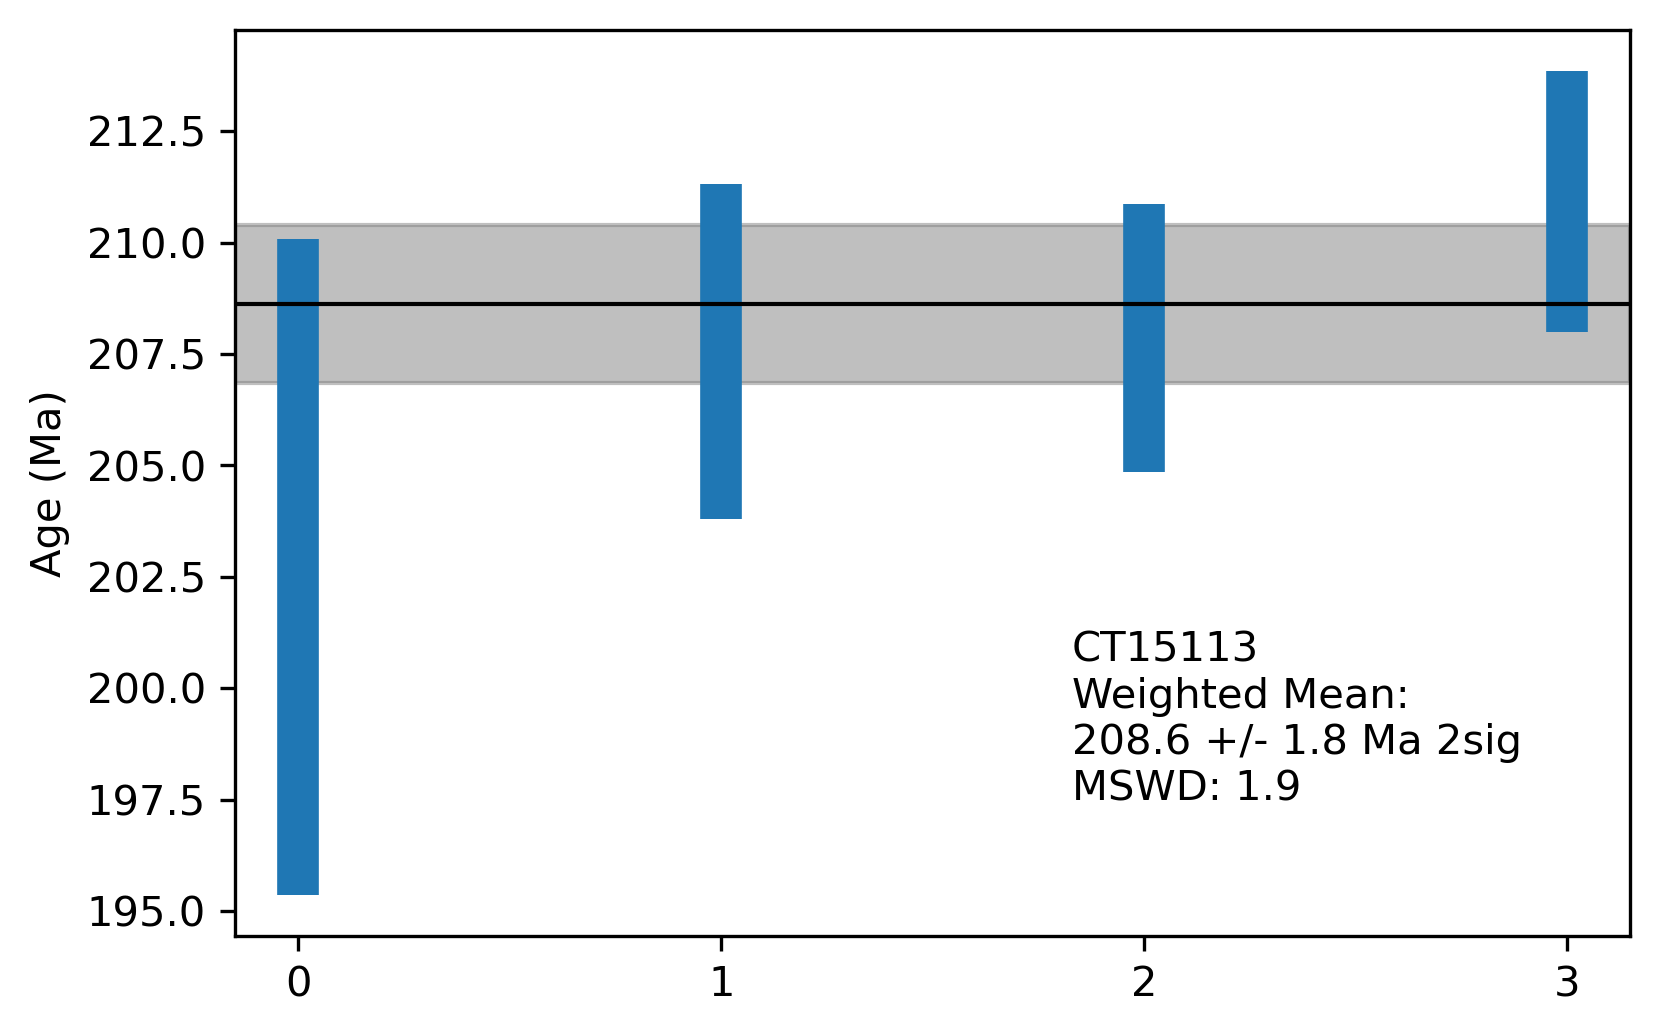

In [7]:
for sample in samples_new:
    sample.calc_mda()
    print(sample.name,np.min(sample.bestage))

In [8]:
for sample in samples_new:
    if sample.name=='AB0926':
        for age in sample.bestage:
            if age<200:
                print(age)

165.04175856494172
152.87171674229728
190.874235029324
180.74745337626578
160.50045973271298
189.2564034812559
0.04604504
174.8681271229813
161.24245444452276
183.88163492630085
169.40142014925473
162.34240369763663
165.3596005931921
167.17989644660764
164.03999897625152
197.39828327625895
168.08704060235078
173.2034109844393
154.42144706607723
173.8370026504722
178.58729504822492
175.39377992560952


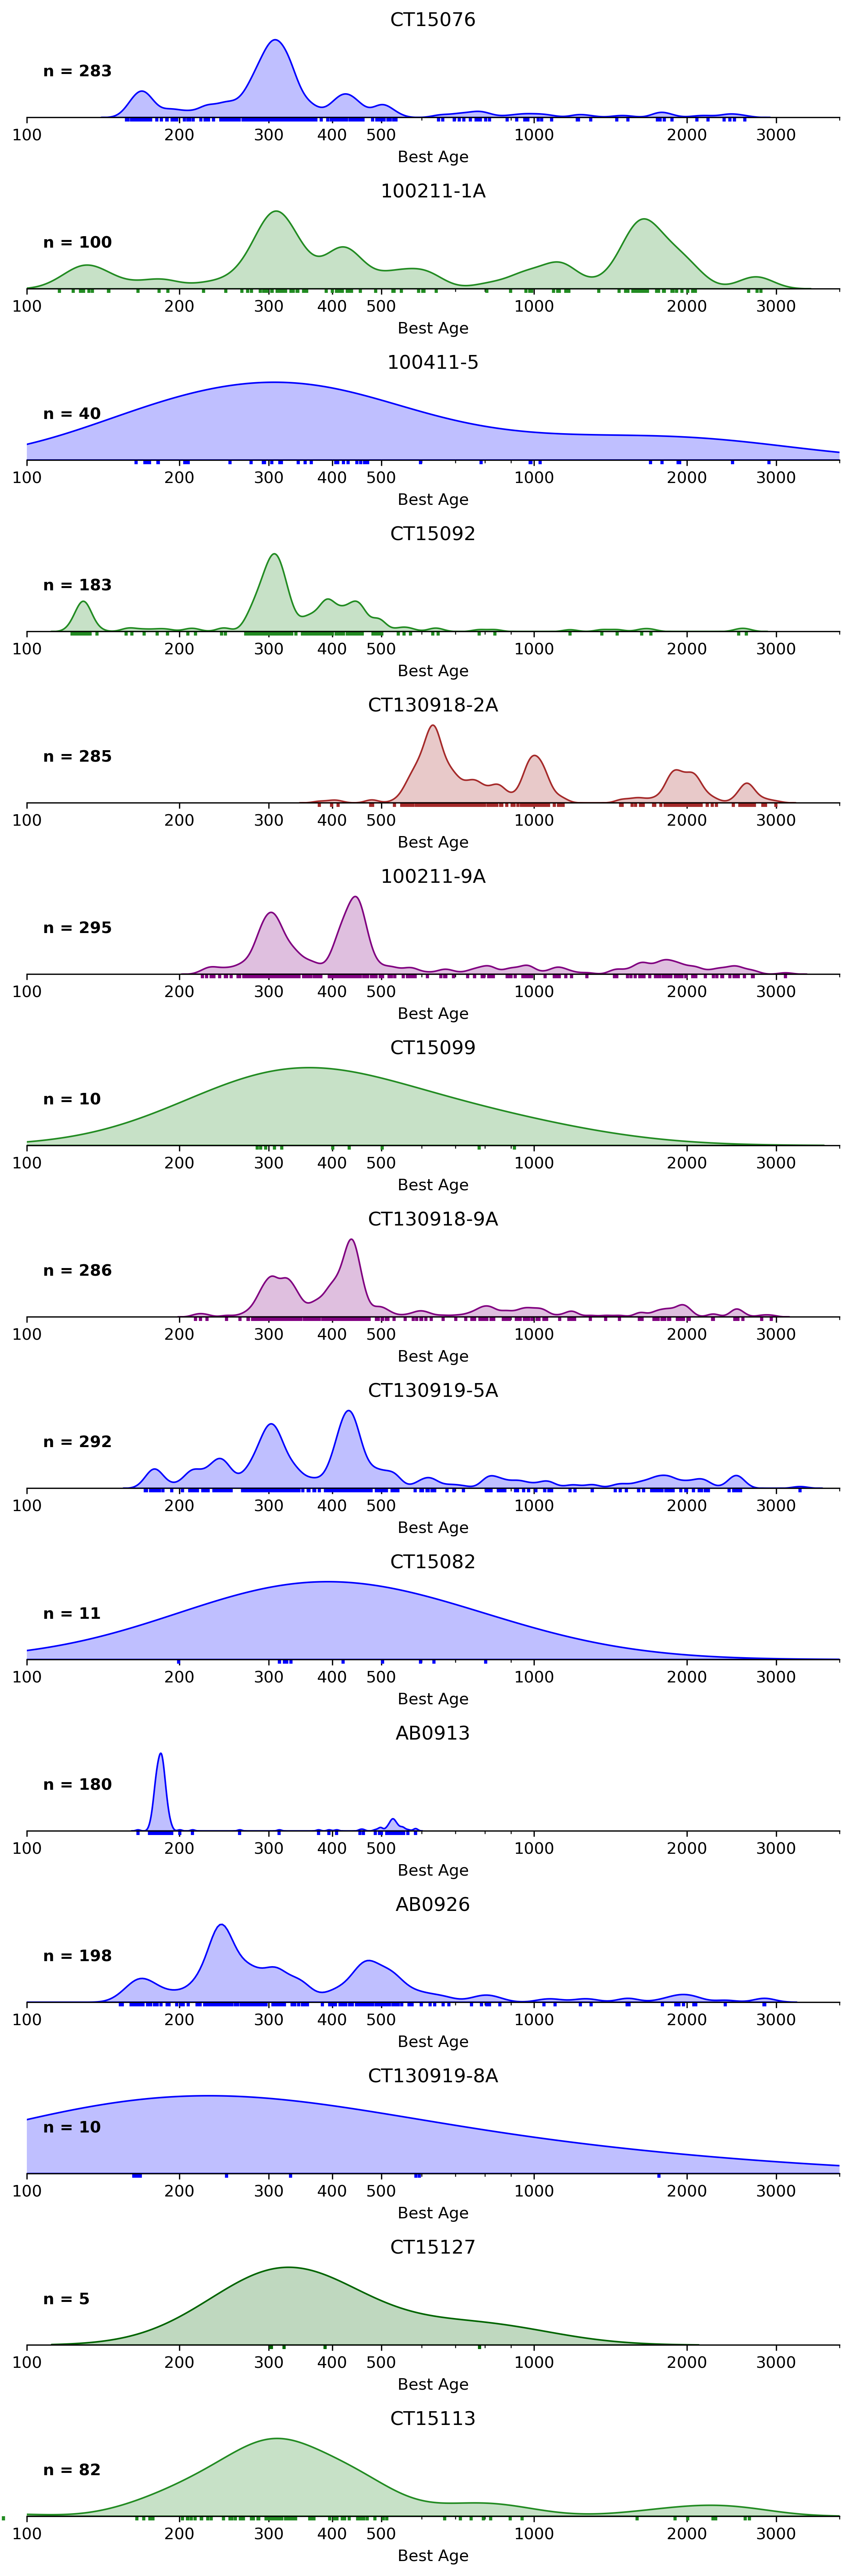

In [14]:
for smp in samples_new:
    if smp.name=='CT15099':
        smp.color='forestgreen'
    if smp.name=='CT15082':
        smp.color='blue'

names = [smp.name for smp in samples_new]
plot_fault_block(names,save=True,filename='new.jpg')
    